In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE
import itertools
import seaborn as sns
import time
import pickle
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,mean_absolute_error,ConfusionMatrixDisplay  
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing 

In [177]:
X_train.columns

Index(['Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Fwd IAT Total',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd Header Length',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'act_data_pkt_fwd'],
      dtype='object')

In [176]:
dataset.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 

In [84]:
dataset=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [179]:
dataset[X_train.columns].describe()

Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
count      225741.000000           225741.000000                225741.000000   
mean            4.874972                4.572851                   939.479993   
std            15.423004               21.755541                  3249.429866   
min             1.000000                0.000000                     0.000000   
25%             2.000000                1.000000                    26.000000   
50%             3.000000                4.000000                    30.000000   
75%             5.000000                5.000000                    63.000000   
max          1932.000000             2942.000000                183012.000000   

       Fwd Packet Length Max  Fwd Packet Length Mean  Fwd Packet Length Std  \
count          225741.000000           225741.000000          225741.000000   
mean              538.545235              164.829636             214.911050   
std              1864.144128              504.896961             797.417625   
min                 0.000000                0.000000               0.000000   
25%                 6.000000                6.000000               0.000000   
50%                20.000000                8.666667               5.301991   
75%                34.000000               32.000000              10.263203   
max             11680.000000             3867.000000            6692.644993   

       Fwd IAT Total   Fwd IAT Std   Fwd IAT Max  Fwd Header Length  \
count   2.257410e+05  2.257410e+05  2.257410e+05      225741.000000   
mean    1.539680e+07  5.195299e+06  1.299457e+07         111.523649   
std     3.160847e+07  1.078643e+07  2.748888e+07         375.793989   
min     0.000000e+00  0.000000e+00  0.000000e+00           0.000000   
25%     1.290000e+02  0.000000e+00  1.240000e+02          64.000000   
50%     2.371300e+04  1.273570e+04  2.302800e+04          72.000000   
75%     7.870784e+06  3.680529e+06  7.548066e+06         100.000000   
max     1.200000e+08  7.670000e+07  1.200000e+08       39396.000000   

       Average Packet Size  Avg Fwd Segment Size  Fwd Header Length.1  \
count        225741.000000         225741.000000        225741.000000   
mean            574.579024            164.829636           111.523649   
std             626.097078            504.896961           375.793989   
min               0.000000              0.000000             0.000000   
25%               7.500000              6.000000            64.000000   
50%             141.000000              8.666667            72.000000   
75%            1291.888889             32.000000           100.000000   
max            2528.000000           3867.000000         39396.000000   

       Subflow Fwd Packets  Subflow Fwd Bytes  Init_Win_bytes_forward  \
count        225741.000000      225741.000000           225741.000000   
mean              4.874972         939.479993             4247.474336   
std              15.423004        3249.429866             8037.836210   
min               1.000000           0.000000               -1.000000   
25%               2.000000          26.000000              229.000000   
50%               3.000000          30.000000              256.000000   
75%               5.000000          63.000000             8192.000000   
max            1932.000000      183012.000000            65535.000000   

       act_data_pkt_fwd  
count     225741.000000  
mean           3.311556  
std           12.270118  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.000000  
max         1931.000000

In [85]:
dataset.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     20          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [86]:
dataset.shape

(225745, 79)

In [87]:
dataset.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count       225745.00000    2.257450e+05       225745.000000   
mean          8879.61946    1.624165e+07            4.874916   
std          19754.64740    3.152437e+07           15.422874   
min              0.00000   -1.000000e+00            1.000000   
25%             80.00000    7.118000e+04            2.000000   
50%             80.00000    1.452333e+06            3.000000   
75%             80.00000    8.805237e+06            5.000000   
max          65532.00000    1.199999e+08         1932.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            225745.000000                225745.000000   
mean                  4.572775                   939.463346   
std                  21.755356                  3249.403484   
min                   0.000000                     0.000000   
25%                   1.000000                    26.000000   
50%                   4.000000                    30.000000   
75%                   5.000000                    63.000000   
max                2942.000000                183012.000000   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.257450e+05           225745.000000   
mean                   5.960477e+03              538.535693   
std                    3.921834e+04             1864.128991   
min                    0.000000e+00                0.000000   
25%                    0.000000e+00                6.000000   
50%                    1.640000e+02               20.000000   
75%                    1.160100e+04               34.000000   
max                    5.172346e+06            11680.000000   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count           225745.000000            225745.000000   
mean                27.882221               164.826715   
std                163.324159               504.892965   
min                  0.000000                 0.000000   
25%                  0.000000                 6.000000   
50%                  0.000000                 8.666667   
75%                  6.000000                32.000000   
max               1472.000000              3867.000000   

        Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
count           225745.000000  ...      225745.000000          225745.000000   
mean               214.907242  ...           3.311497              21.482753   
std                797.411073  ...          12.270018               4.166799   
min                  0.000000  ...           0.000000               0.000000   
25%                  0.000000  ...           1.000000              20.000000   
50%                  5.301991  ...           2.000000              20.000000   
75%                 10.263203  ...           4.000000              20.000000   
max               6692.644993  ...        1931.000000              52.000000   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  2.257450e+05  2.257450e+05  2.257450e+05  2.257450e+05  2.257450e+05   
mean   1.848261e+05  1.293436e+04  2.080849e+05  1.776201e+05  1.032214e+07   
std    7.979250e+05  2.102737e+05  9.002350e+05  7.842602e+05  2.185303e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.878000e+03  0.000000e+00  1.878000e+03  1.862000e+03  8.239725e+06   
max    1.000000e+08  3.950000e+07  1.000000e+08  1.000000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  2.257450e+05  2.257450e+05  2.257450e+05  
mean   3.611943e+06  1.287813e+07  7.755355e+06  
std    1.275689e+07  2.692126e+07  1.983109e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.00

In [88]:
dataset.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     20          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [89]:
dataset.groupby(' Label').first()

Destination Port   Flow Duration   Total Fwd Packets  \
 Label                                                          
BENIGN              54865               3                   2   
DDoS                   80         1293792                   3   

         Total Backward Packets  Total Length of Fwd Packets  \
 Label                                                         
BENIGN                        0                           12   
DDoS                          7                           26   

         Total Length of Bwd Packets   Fwd Packet Length Max  \
 Label                                                         
BENIGN                             0                       6   
DDoS                           11607                      20   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
 Label                                                    
BENIGN                       6                 6.000000   
DDoS                         0                 8.666667   

         Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
 Label                          ...                                             
BENIGN                0.000000  ...                  1                     20   
DDoS                 10.263203  ...                  2                     20   

        Active Mean   Active Std   Active Max   Active Min  Idle Mean  \
 Label                                                                  
BENIGN          0.0          0.0            0            0        0.0   
DDoS            0.0          0.0            0            0        0.0   

         Idle Std   Idle Max   Idle Min  
 Label                                   
BENIGN        0.0          0          0  
DDoS          0.0          0          0  

[2 rows x 78 columns]

In [90]:
dataset.groupby(' Label').count()

Destination Port   Flow Duration   Total Fwd Packets  \
 Label                                                          
BENIGN              97718           97718               97718   
DDoS               128027          128027              128027   

         Total Backward Packets  Total Length of Fwd Packets  \
 Label                                                         
BENIGN                    97718                        97718   
DDoS                     128027                       128027   

         Total Length of Bwd Packets   Fwd Packet Length Max  \
 Label                                                         
BENIGN                         97718                   97718   
DDoS                          128027                  128027   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
 Label                                                    
BENIGN                   97718                    97718   
DDoS                    128027                   128027   

         Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
 Label                          ...                                             
BENIGN                   97718  ...              97718                  97718   
DDoS                    128027  ...             128027                 128027   

        Active Mean   Active Std   Active Max   Active Min  Idle Mean  \
 Label                                                                  
BENIGN        97718        97718        97718        97718      97718   
DDoS         128027       128027       128027       128027     128027   

         Idle Std   Idle Max   Idle Min  
 Label                                   
BENIGN      97718      97718      97718  
DDoS       128027     128027     128027  

[2 rows x 78 columns]

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [92]:
dataset.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [93]:
dataset.columns = ["Destination Port", 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label']

In [94]:
print ('BENIGN types: ', len(dataset.loc[dataset['Label']=='BENIGN']))
print ('Fraction of BENIGN types:', float(len(dataset.loc[dataset['Label']=='BENIGN'])/dataset.shape[0]))

BENIGN types:  97718
Fraction of BENIGN types: 0.4328689450486168


In [95]:
print ('DDoS types: ', len(dataset.loc[dataset['Label']=='DDoS']))
print ('Fraction of DDoS types:', float(len(dataset.loc[dataset['Label']=='DDoS'])/dataset.shape[0]))

DDoS types:  128027
Fraction of DDoS types: 0.5671310549513832


In [96]:

dataset=dataset.dropna(axis=0, how='any')
dataset=dataset.replace(',,', np.nan, inplace=False)

In [97]:
for i in dataset.columns:
    try:

        contains_infinity = np.isinf(dataset[i]).any()

        # Print the result
        print(i, contains_infinity)
    except:
        continue

Destination Port False
Flow Duration False
Total Fwd Packets False
Total Backward Packets False
Total Length of Fwd Packets False
Total Length of Bwd Packets False
Fwd Packet Length Max False
Fwd Packet Length Min False
Fwd Packet Length Mean False
Fwd Packet Length Std False
Bwd Packet Length Max False
Bwd Packet Length Min False
Bwd Packet Length Mean False
Bwd Packet Length Std False
Flow Bytes/s True
Flow Packets/s True
Flow IAT Mean False
Flow IAT Std False
Flow IAT Max False
Flow IAT Min False
Fwd IAT Total False
Fwd IAT Mean False
Fwd IAT Std False
Fwd IAT Max False
Fwd IAT Min False
Bwd IAT Total False
Bwd IAT Mean False
Bwd IAT Std False
Bwd IAT Max False
Bwd IAT Min False
Fwd PSH Flags False
Bwd PSH Flags False
Fwd URG Flags False
Bwd URG Flags False
Fwd Header Length False
Bwd Header Length False
Fwd Packets/s False
Bwd Packets/s False
Min Packet Length False
Max Packet Length False
Packet Length Mean False
Packet Length Std False
Packet Length Variance False
FIN Flag Count 

In [98]:
dataset = dataset[dataset['Flow Bytes/s'] != "Infinity"]

In [99]:
dataset = dataset[dataset['Flow Packets/s'] != "Infinity"] 

In [100]:
dataset["Bwd Avg Bulk Rate"].replace(",,", np.nan, inplace=True)

In [101]:
dataset["Bwd Avg Bulk Rate"].replace(",,", np.nan, inplace=True)
dataset["Bwd Avg Packets/Bulk"].replace(",,", np.nan, inplace=True)
dataset["Bwd Avg Bytes/Bulk"].replace(",,", np.nan, inplace=True)
dataset["Fwd Avg Bulk Rate"].replace(",,", np.nan, inplace=True)
dataset["Fwd Avg Packets/Bulk"].replace(",,",np.nan, inplace=True)
dataset["Fwd Avg Bytes/Bulk"].replace(",,", np.nan, inplace=True)
dataset["CWE Flag Count"].replace(",,", np.nan, inplace=True)
dataset["Bwd URG Flags"].replace(",,", np.nan, inplace=True)
dataset["Bwd PSH Flags"].replace(",,", np.nan, inplace=True)
dataset["Fwd URG Flags"].replace(",,", np.nan, inplace=True)

In [102]:
dataset.dropna()

Destination Port  Flow Duration  Total Fwd Packets  \
0                  54865              3                  2   
1                  55054            109                  1   
2                  55055             52                  1   
3                  46236             34                  1   
4                  54863              3                  2   
...                  ...            ...                ...   
225740             61374             61                  1   
225741             61378             72                  1   
225742             61375             75                  1   
225743             61323             48                  2   
225744             61326             68                  1   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            1                            6   
2                            1                            6   
3                            1                            6   
4                            0                           12   
...                        ...                          ...   
225740                       1                            6   
225741                       1                            6   
225742                       1                            6   
225743                       0                           12   
225744                       1                            6   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 6                      6   
2                                 6                      6   
3                                 6                      6   
4                                 0                      6   
...                             ...                    ...   
225740                            6                      6   
225741                            6                      6   
225742                            6                      6   
225743                            0                      6   
225744                            6                      6   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                    0.0   
1                           6                     6.0                    0.0   
2                           6                     6.0                    0.0   
3                           6                     6.0                    0.0   
4                           6                     6.0                    0.0   
...                       ...                     ...                    ...   
225740                      6                     6.0                    0.0   
225741                      6                     6.0                    0.0   
225742                      6                     6.0                    0.0   
225743                      6                     6.0                    0.0   
225744                      6                     6.0                    0.0   

        ...  min_seg_size_forward  Active Mean  Active Std  Active Max  \
0       ...                    20          0.0         0.0           0   
1       ...                    20          0.0         0.0           0   
2       ...                    20          0.0         0.0           0   
3       ...                    20          0.0         0.0           0   
4       ...                    20          0.0         0.0           0   
...     ...                   ...          ...         ...         ...   
225740  ...                    20          0.0         0.0           0   
225741  ...                    20          0.0         0.0           0   
225742  ...                    20          0.0         0.0           0   
225743  ...                    20          0.0         0.0  

In [103]:
dataset['Flow Bytes/s'].replace(np.inf, 0,inplace=True)
dataset["Flow Packets/s"].replace(np.inf, 0, inplace=True)
dataset["Flow Packets/s"].replace(np.nan, 0, inplace=True)
dataset['Flow Bytes/s'].replace(np.nan, 0,inplace=True)


dataset["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
dataset["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
dataset["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)

dataset["Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
dataset["Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


dataset["Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
dataset["Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


dataset["Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
dataset["Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
dataset["Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)


dataset["Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
dataset["Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


dataset["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
dataset["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


dataset["CWE Flag Count"].replace("Infinity", 0, inplace=True)
dataset["CWE Flag Count"].replace(",,", 0, inplace=True)
dataset["CWE Flag Count"].replace(np.nan, 0, inplace=True)

dataset["Bwd URG Flags"].replace("Infinity", 0, inplace=True)
dataset["Bwd URG Flags"].replace(",,", 0, inplace=True)
dataset["Bwd URG Flags"].replace(np.nan, 0, inplace=True)

dataset["Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
dataset["Bwd PSH Flags"].replace(",,", 0, inplace=True)
dataset["Bwd PSH Flags"].replace(np.nan, 0, inplace=True)

dataset["Fwd URG Flags"].replace("Infinity", 0, inplace=True)
dataset["Fwd URG Flags"].replace(",,", 0, inplace=True)
dataset["Fwd URG Flags"].replace(np.nan, 0, inplace=True)

In [104]:
for i in dataset.columns:
    try:

        contains_infinity = np.isinf(dataset[i]).any()

        # Print the result
        print(i, contains_infinity)
    except:
        continue

Destination Port False
Flow Duration False
Total Fwd Packets False
Total Backward Packets False
Total Length of Fwd Packets False
Total Length of Bwd Packets False
Fwd Packet Length Max False
Fwd Packet Length Min False
Fwd Packet Length Mean False
Fwd Packet Length Std False
Bwd Packet Length Max False
Bwd Packet Length Min False
Bwd Packet Length Mean False
Bwd Packet Length Std False
Flow Bytes/s False
Flow Packets/s False
Flow IAT Mean False
Flow IAT Std False
Flow IAT Max False
Flow IAT Min False
Fwd IAT Total False
Fwd IAT Mean False
Fwd IAT Std False
Fwd IAT Max False
Fwd IAT Min False
Bwd IAT Total False
Bwd IAT Mean False
Bwd IAT Std False
Bwd IAT Max False
Bwd IAT Min False
Fwd PSH Flags False
Bwd PSH Flags False
Fwd URG Flags False
Bwd URG Flags False
Fwd Header Length False
Bwd Header Length False
Fwd Packets/s False
Bwd Packets/s False
Min Packet Length False
Max Packet Length False
Packet Length Mean False
Packet Length Std False
Packet Length Variance False
FIN Flag Coun

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225741 non-null  int64  
 1   Flow Duration                225741 non-null  int64  
 2   Total Fwd Packets            225741 non-null  int64  
 3   Total Backward Packets       225741 non-null  int64  
 4   Total Length of Fwd Packets  225741 non-null  int64  
 5   Total Length of Bwd Packets  225741 non-null  int64  
 6   Fwd Packet Length Max        225741 non-null  int64  
 7   Fwd Packet Length Min        225741 non-null  int64  
 8   Fwd Packet Length Mean       225741 non-null  float64
 9   Fwd Packet Length Std        225741 non-null  float64
 10  Bwd Packet Length Max        225741 non-null  int64  
 11  Bwd Packet Length Min        225741 non-null  int64  
 12  Bwd Packet Length Mean       225741 non-null  float64
 13  Bwd 

In [106]:
dataset["Flow Bytes/s"]=dataset["Flow Bytes/s"].astype("float64")
dataset['Flow Packets/s']=dataset["Flow Packets/s"].astype("float64")
dataset['Bwd Avg Bulk Rate']=dataset["Bwd Avg Bulk Rate"].astype("float64")
dataset['Bwd Avg Packets/Bulk']=dataset["Bwd Avg Packets/Bulk"].astype("float64")
dataset['Bwd Avg Bytes/Bulk']=dataset["Bwd Avg Bytes/Bulk"].astype("float64")
dataset['Fwd Avg Bulk Rate']=dataset["Fwd Avg Bulk Rate"].astype("float64")
dataset['Fwd Avg Packets/Bulk']=dataset["Fwd Avg Packets/Bulk"].astype("float64")
dataset['Fwd Avg Bytes/Bulk']=dataset["Fwd Avg Bytes/Bulk"].astype("float64")
dataset['CWE Flag Count']=dataset["CWE Flag Count"].astype("float64")
dataset['Bwd URG Flags']=dataset["Bwd URG Flags"].astype("float64")
dataset['Bwd PSH Flags']=dataset["Bwd PSH Flags"].astype("float64")
dataset['Fwd URG Flags']=dataset["Fwd URG Flags"].astype("float64")

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225741 non-null  int64  
 1   Flow Duration                225741 non-null  int64  
 2   Total Fwd Packets            225741 non-null  int64  
 3   Total Backward Packets       225741 non-null  int64  
 4   Total Length of Fwd Packets  225741 non-null  int64  
 5   Total Length of Bwd Packets  225741 non-null  int64  
 6   Fwd Packet Length Max        225741 non-null  int64  
 7   Fwd Packet Length Min        225741 non-null  int64  
 8   Fwd Packet Length Mean       225741 non-null  float64
 9   Fwd Packet Length Std        225741 non-null  float64
 10  Bwd Packet Length Max        225741 non-null  int64  
 11  Bwd Packet Length Min        225741 non-null  int64  
 12  Bwd Packet Length Mean       225741 non-null  float64
 13  Bwd 

In [108]:
dataset['Label'].value_counts()

Label
DDoS      128027
BENIGN     97714
Name: count, dtype: int64

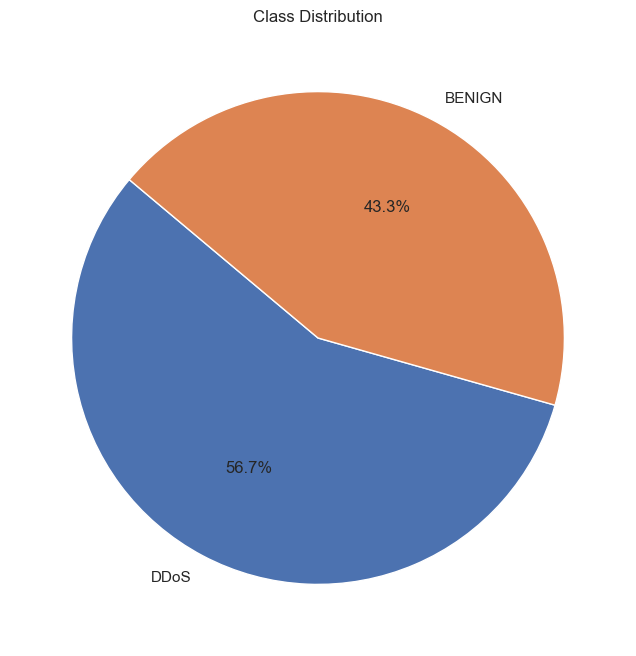

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = dataset['Label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

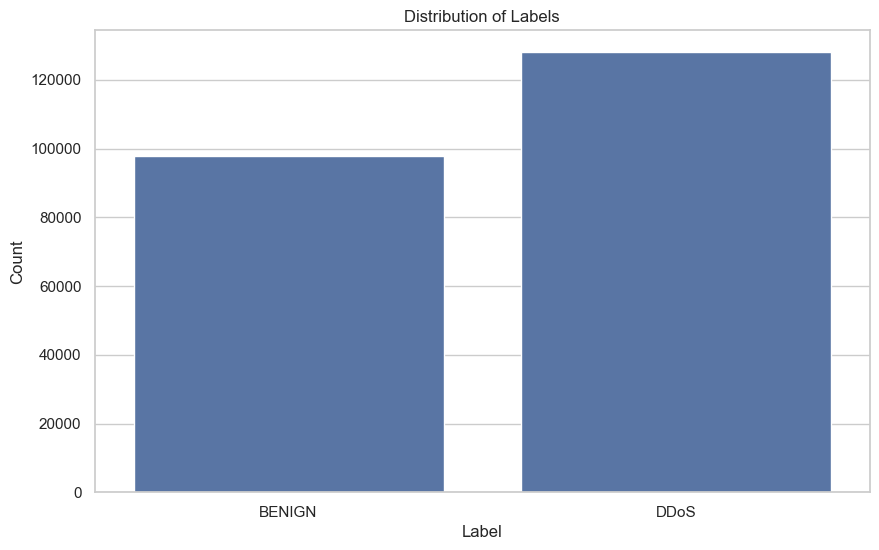

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot a histogram for the 'Label' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=dataset)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




In [111]:
np.unique(dataset['Label'].values)

array(['BENIGN', 'DDoS'], dtype=object)

In [112]:
dataset.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [113]:
dataset

Destination Port  Flow Duration  Total Fwd Packets  \
0                  54865              3                  2   
1                  55054            109                  1   
2                  55055             52                  1   
3                  46236             34                  1   
4                  54863              3                  2   
...                  ...            ...                ...   
225740             61374             61                  1   
225741             61378             72                  1   
225742             61375             75                  1   
225743             61323             48                  2   
225744             61326             68                  1   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            1                            6   
2                            1                            6   
3                            1                            6   
4                            0                           12   
...                        ...                          ...   
225740                       1                            6   
225741                       1                            6   
225742                       1                            6   
225743                       0                           12   
225744                       1                            6   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 6                      6   
2                                 6                      6   
3                                 6                      6   
4                                 0                      6   
...                             ...                    ...   
225740                            6                      6   
225741                            6                      6   
225742                            6                      6   
225743                            0                      6   
225744                            6                      6   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                    0.0   
1                           6                     6.0                    0.0   
2                           6                     6.0                    0.0   
3                           6                     6.0                    0.0   
4                           6                     6.0                    0.0   
...                       ...                     ...                    ...   
225740                      6                     6.0                    0.0   
225741                      6                     6.0                    0.0   
225742                      6                     6.0                    0.0   
225743                      6                     6.0                    0.0   
225744                      6                     6.0                    0.0   

        ...  min_seg_size_forward  Active Mean  Active Std  Active Max  \
0       ...                    20          0.0         0.0           0   
1       ...                    20          0.0         0.0           0   
2       ...                    20          0.0         0.0           0   
3       ...                    20          0.0         0.0           0   
4       ...                    20          0.0         0.0           0   
...     ...                   ...          ...         ...         ...   
225740  ...                    20          0.0         0.0           0   
225741  ...                    20          0.0         0.0           0   
225742  ...                    20          0.0         0.0           0   
225743  ...                    20          0.0         0.0  

In [114]:
dataset_grouped=dataset.groupby(by='Label')
print(dataset_grouped.Label.count()) 

Label
BENIGN     97714
DDoS      128027
Name: Label, dtype: int64


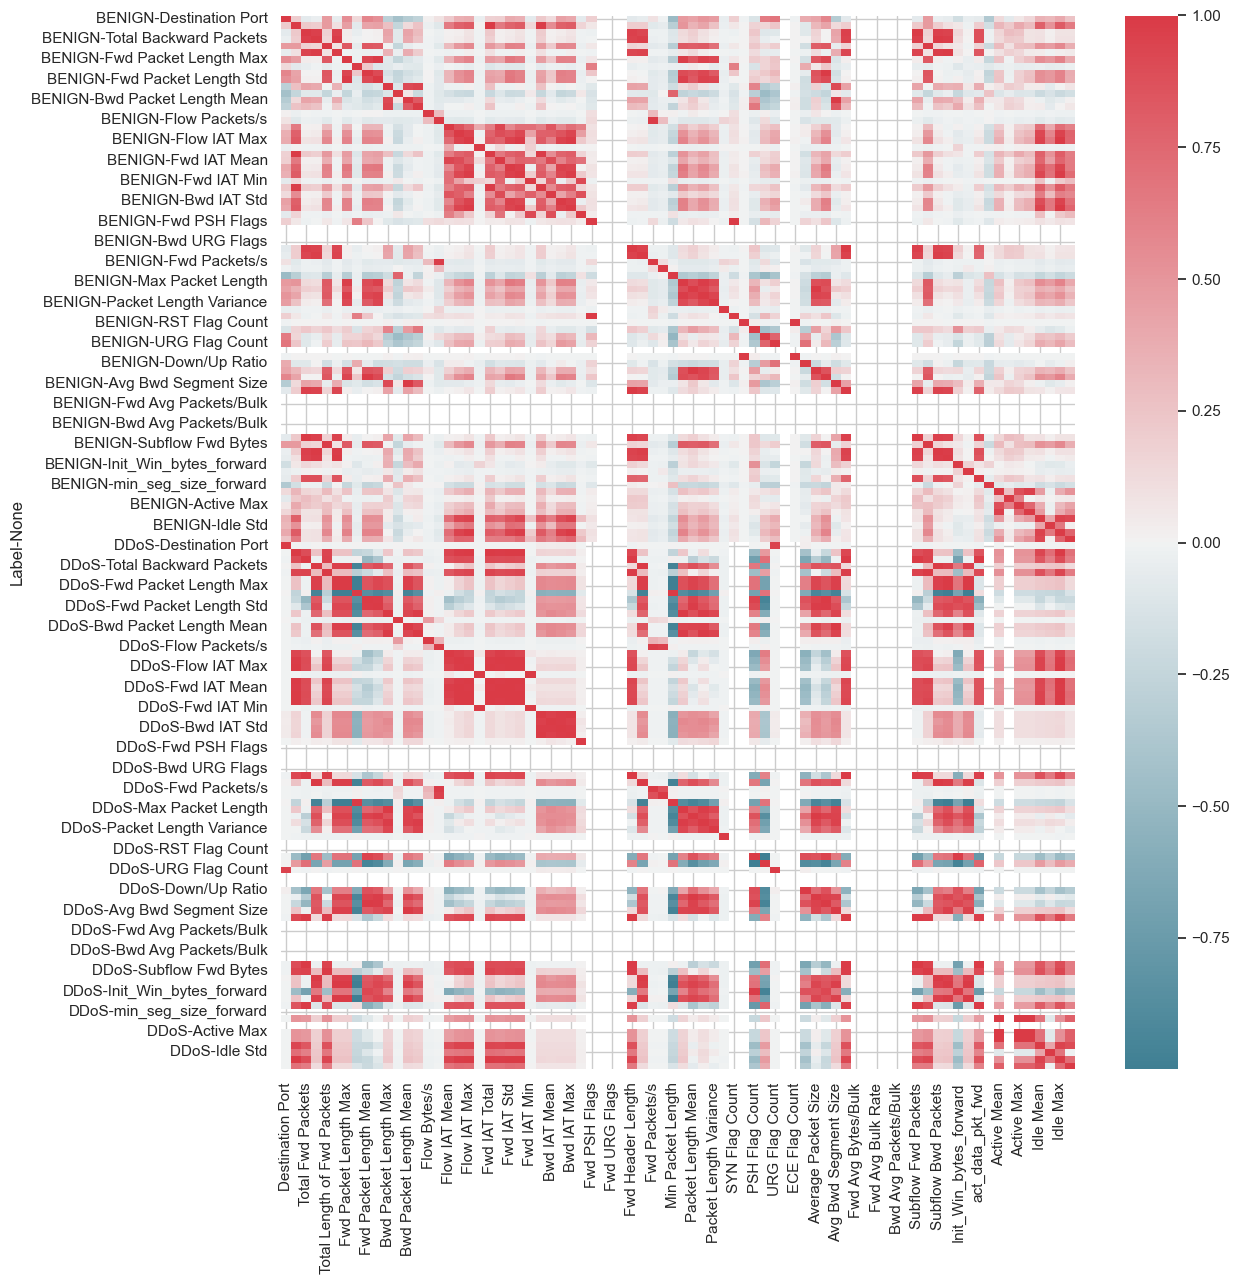

In [115]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(dataset_grouped.corr(), cmap=cmap, annot=False)

f.tight_layout()

In [116]:
drop_cols = []
for i in dataset.columns:
    if len(dataset[i].unique())==1:
        drop_cols.append(i)
        print(i)
print("Total columns with only 1 unique value:", len(drop_cols))


Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
CWE Flag Count
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate
Total columns with only 1 unique value: 10


In [117]:
dataset.drop(labels=drop_cols,axis= 1, inplace=True)

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225741 non-null  int64  
 1   Flow Duration                225741 non-null  int64  
 2   Total Fwd Packets            225741 non-null  int64  
 3   Total Backward Packets       225741 non-null  int64  
 4   Total Length of Fwd Packets  225741 non-null  int64  
 5   Total Length of Bwd Packets  225741 non-null  int64  
 6   Fwd Packet Length Max        225741 non-null  int64  
 7   Fwd Packet Length Min        225741 non-null  int64  
 8   Fwd Packet Length Mean       225741 non-null  float64
 9   Fwd Packet Length Std        225741 non-null  float64
 10  Bwd Packet Length Max        225741 non-null  int64  
 11  Bwd Packet Length Min        225741 non-null  int64  
 12  Bwd Packet Length Mean       225741 non-null  float64
 13  Bwd 

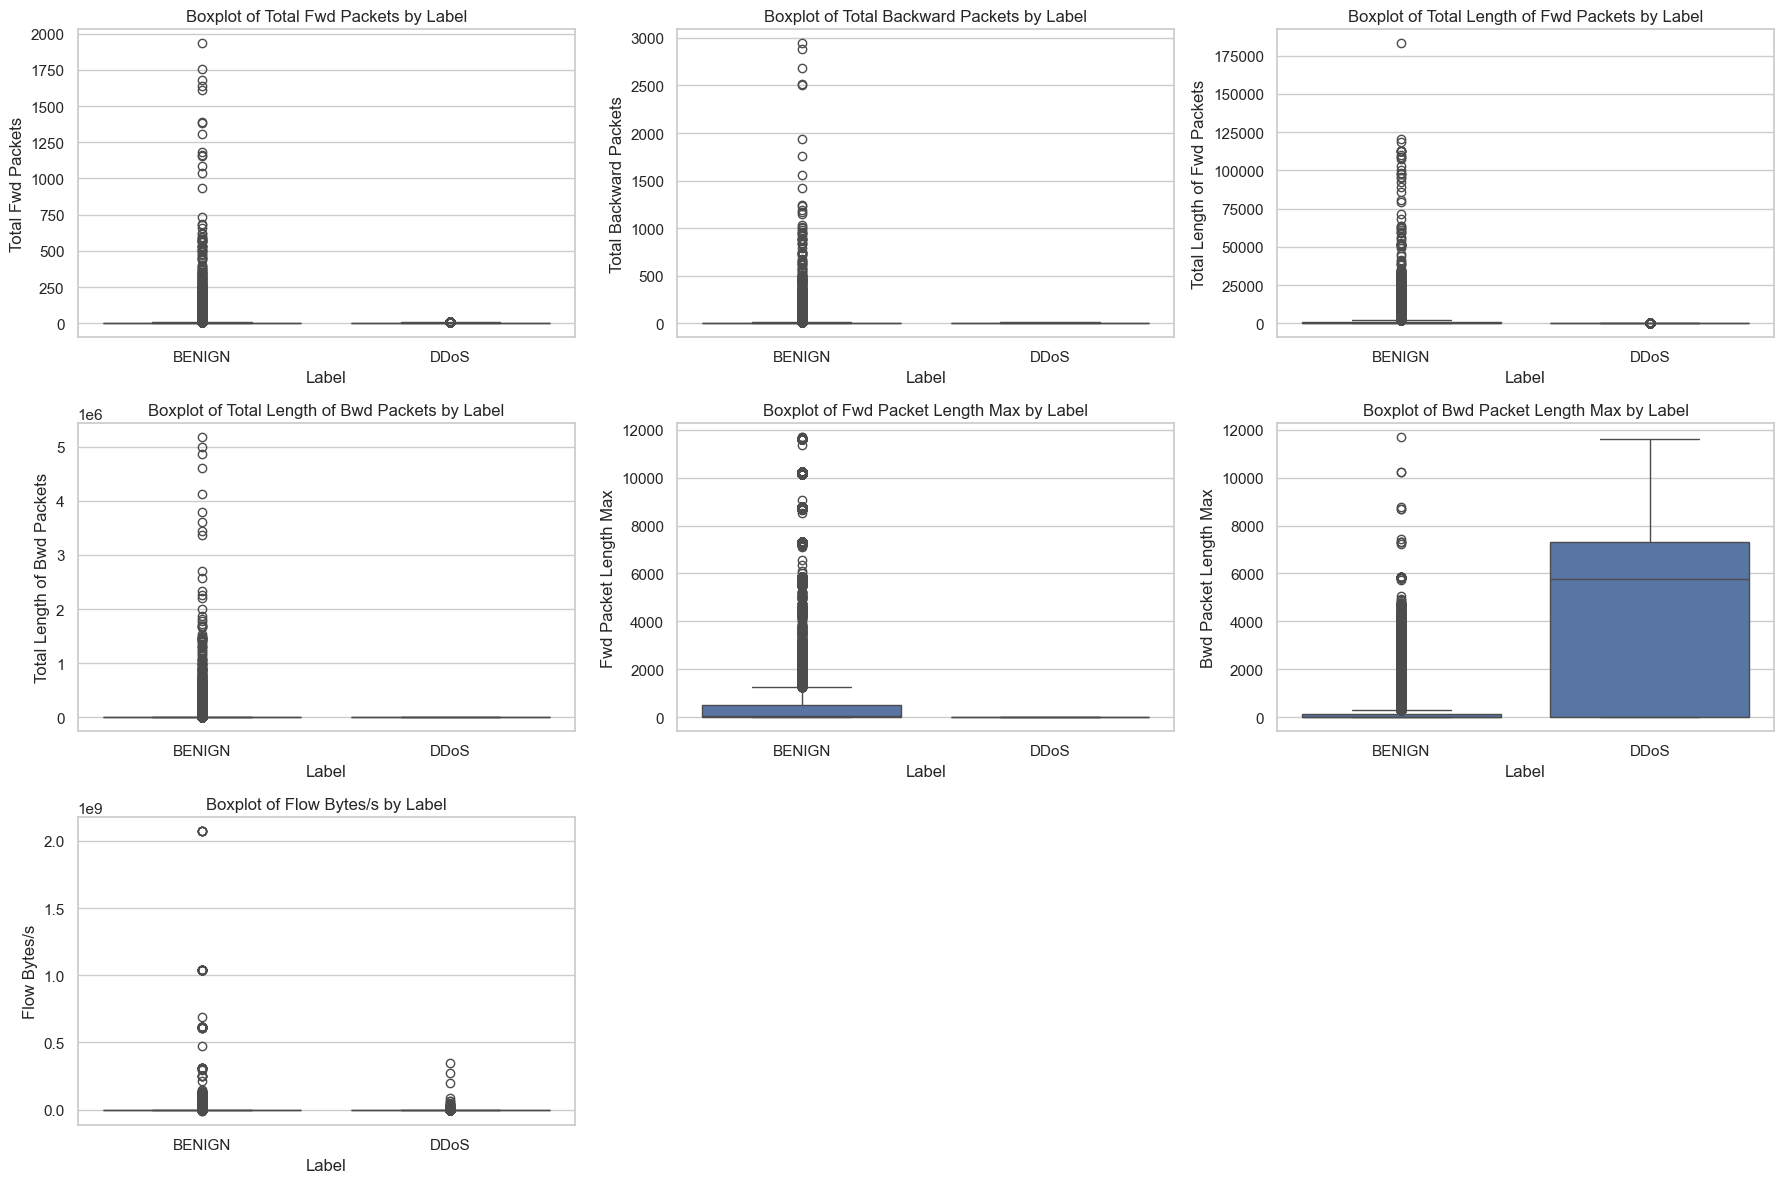

In [119]:
selected_features = ['Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Max', 'Flow Bytes/s']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Label', y=feature, data=dataset)
    plt.title(f'Boxplot of {feature} by Label')

plt.tight_layout()
plt.show()







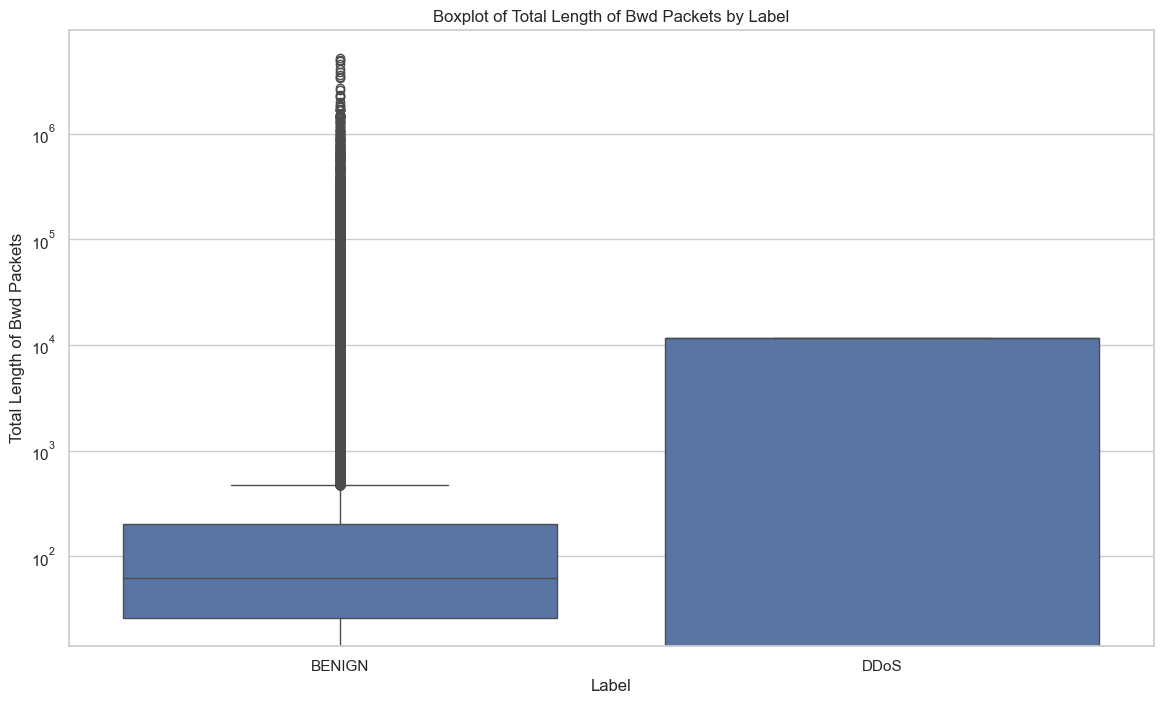

In [120]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Label', y='Total Length of Bwd Packets', data=dataset)
plt.yscale('log')  # Use log scale for better visibility
plt.title('Boxplot of Total Length of Bwd Packets by Label')
plt.xlabel('Label')
plt.ylabel('Total Length of Bwd Packets')
plt.show()

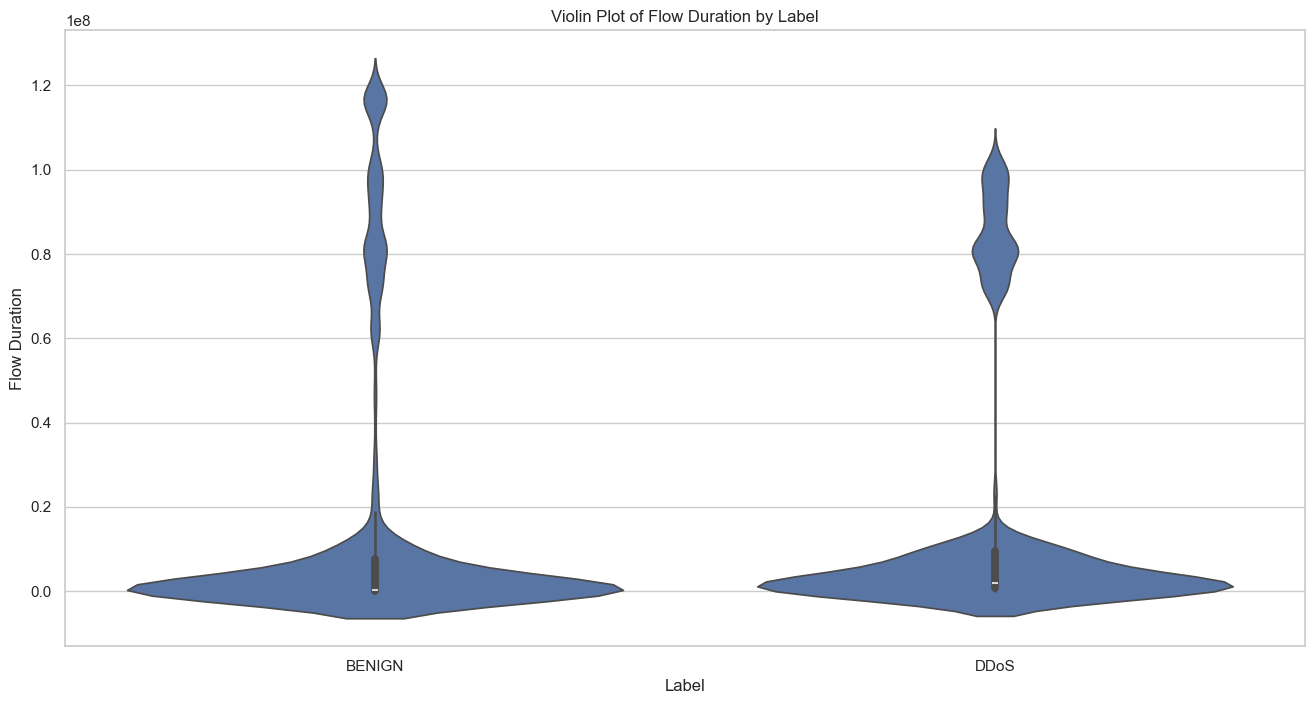

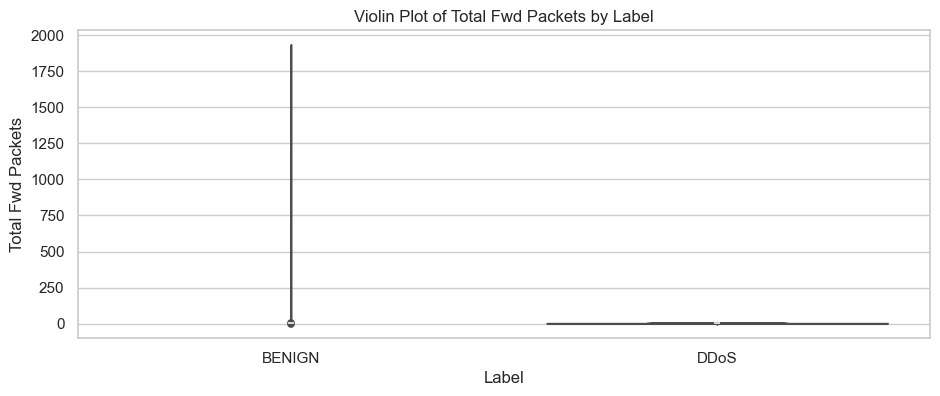

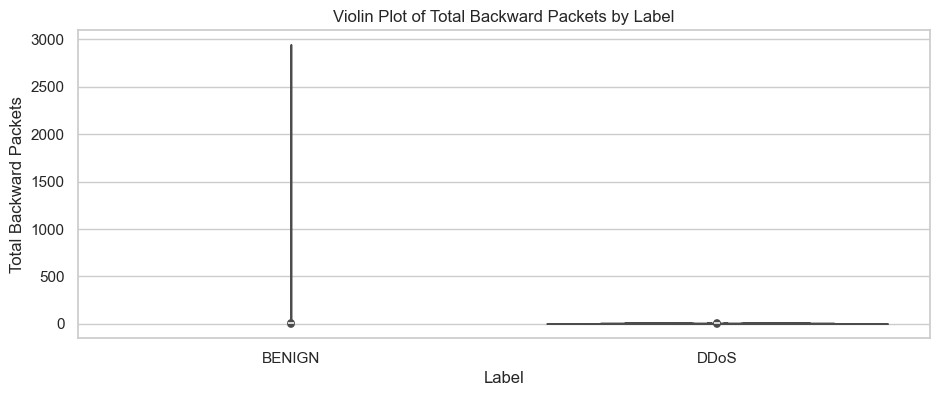

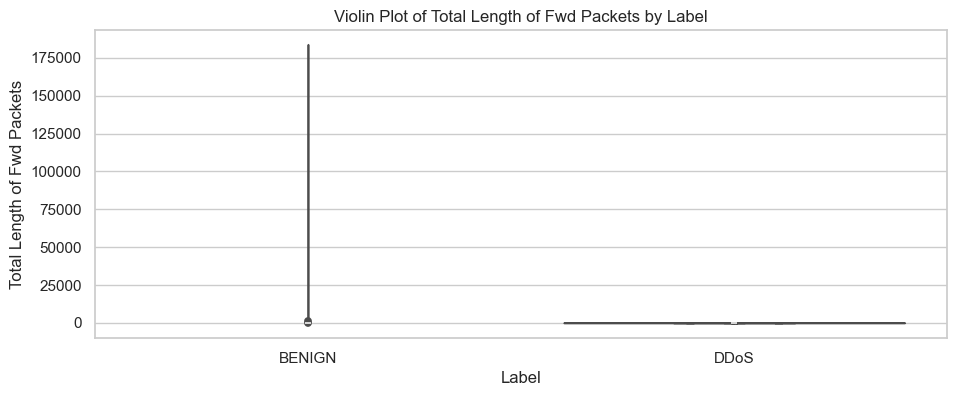

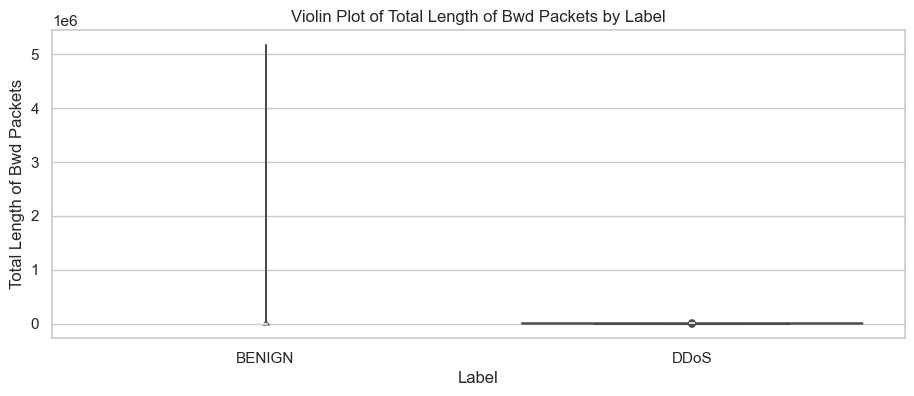

In [121]:
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets']
plt.figure(figsize=(16, 8))
for feature in selected_features:
    sns.violinplot(x='Label', y=feature, data=dataset)
    plt.title(f'Violin Plot of {feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()


In [122]:
dataset

Destination Port  Flow Duration  Total Fwd Packets  \
0                  54865              3                  2   
1                  55054            109                  1   
2                  55055             52                  1   
3                  46236             34                  1   
4                  54863              3                  2   
...                  ...            ...                ...   
225740             61374             61                  1   
225741             61378             72                  1   
225742             61375             75                  1   
225743             61323             48                  2   
225744             61326             68                  1   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            1                            6   
2                            1                            6   
3                            1                            6   
4                            0                           12   
...                        ...                          ...   
225740                       1                            6   
225741                       1                            6   
225742                       1                            6   
225743                       0                           12   
225744                       1                            6   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 6                      6   
2                                 6                      6   
3                                 6                      6   
4                                 0                      6   
...                             ...                    ...   
225740                            6                      6   
225741                            6                      6   
225742                            6                      6   
225743                            0                      6   
225744                            6                      6   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                    0.0   
1                           6                     6.0                    0.0   
2                           6                     6.0                    0.0   
3                           6                     6.0                    0.0   
4                           6                     6.0                    0.0   
...                       ...                     ...                    ...   
225740                      6                     6.0                    0.0   
225741                      6                     6.0                    0.0   
225742                      6                     6.0                    0.0   
225743                      6                     6.0                    0.0   
225744                      6                     6.0                    0.0   

        ...  min_seg_size_forward  Active Mean  Active Std  Active Max  \
0       ...                    20          0.0         0.0           0   
1       ...                    20          0.0         0.0           0   
2       ...                    20          0.0         0.0           0   
3       ...                    20          0.0         0.0           0   
4       ...                    20          0.0         0.0           0   
...     ...                   ...          ...         ...         ...   
225740  ...                    20          0.0         0.0           0   
225741  ...                    20          0.0         0.0           0   
225742  ...                    20          0.0         0.0           0   
225743  ...                    20          0.0         0.0  

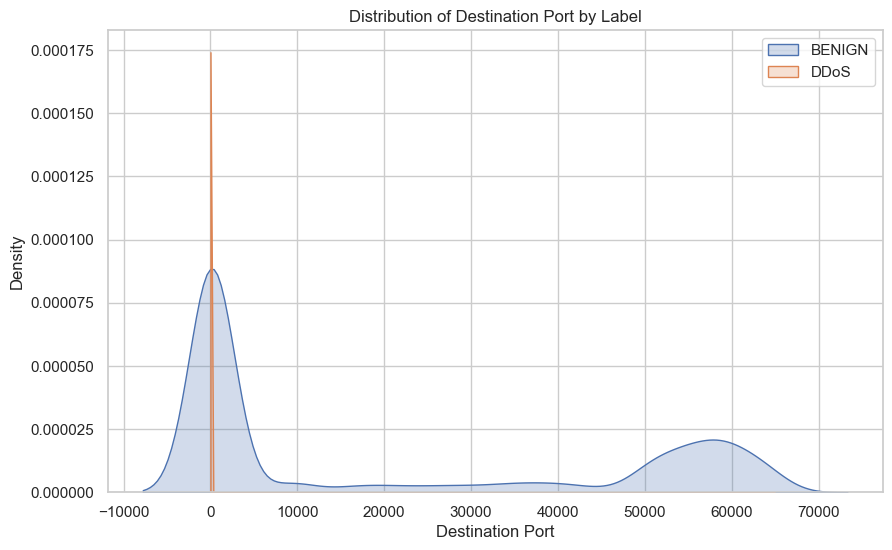

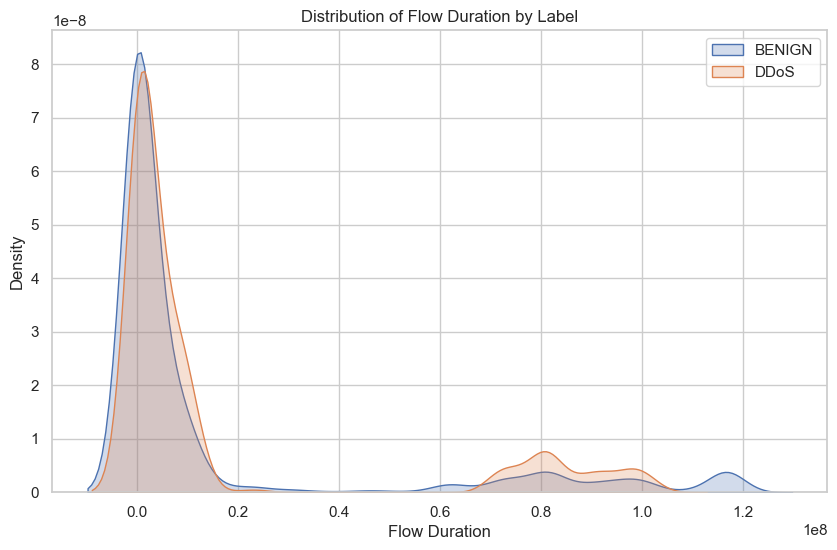

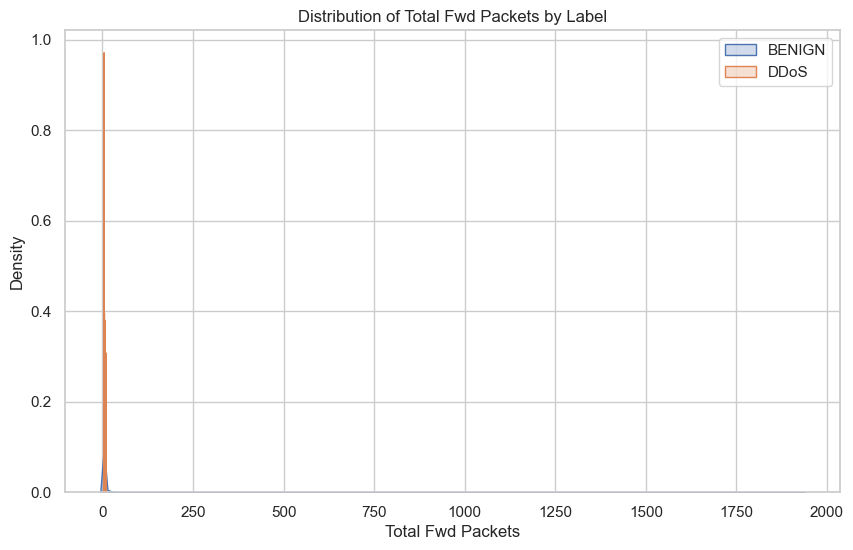

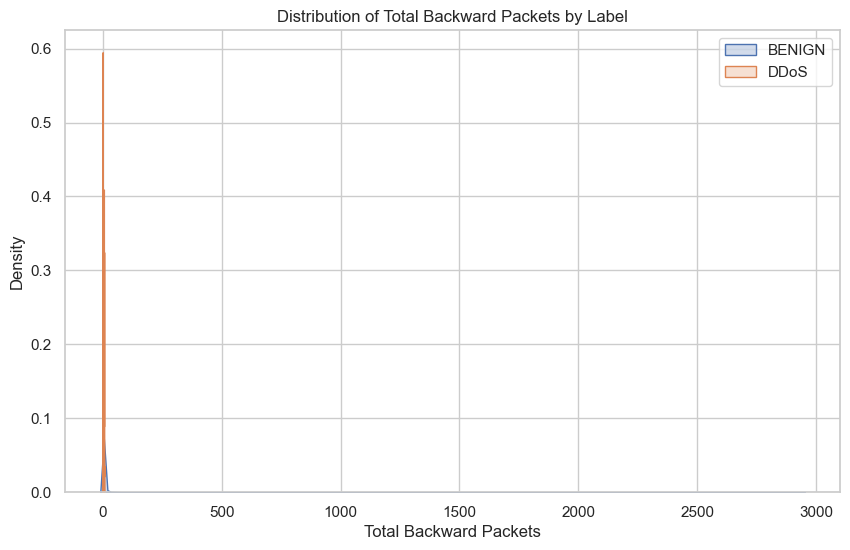

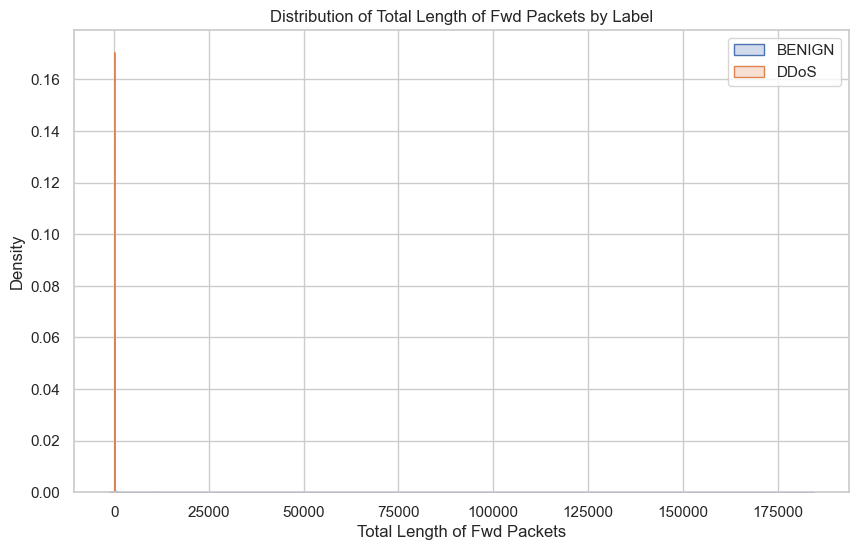

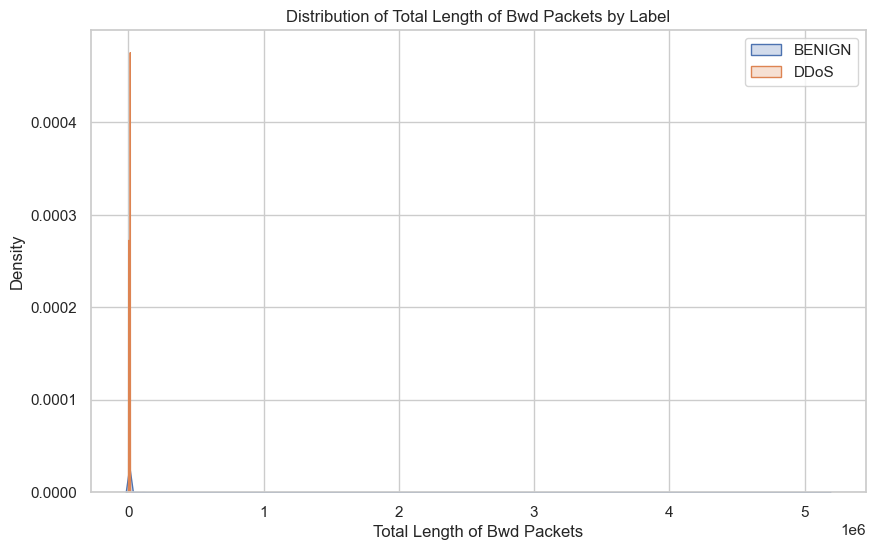

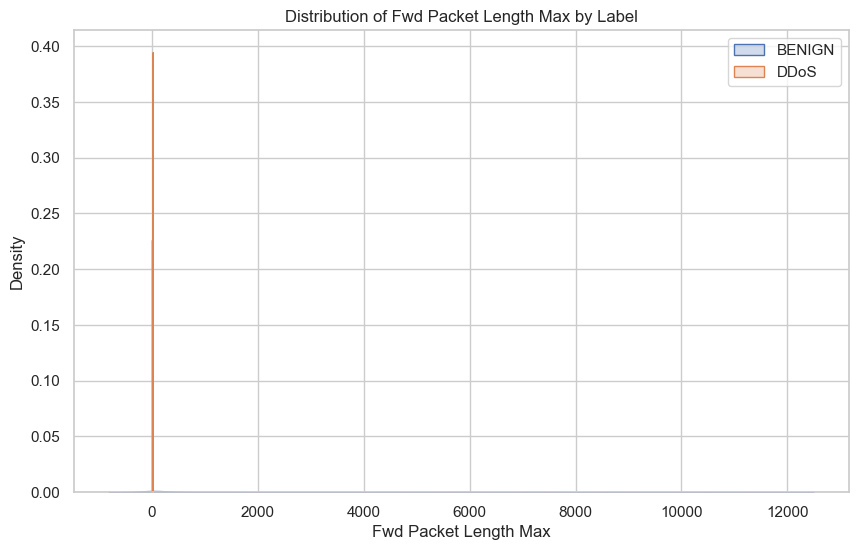

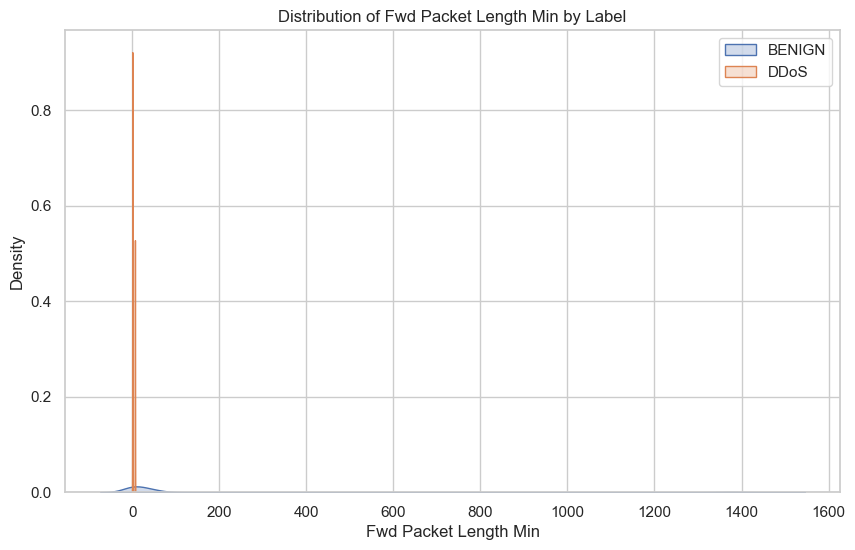

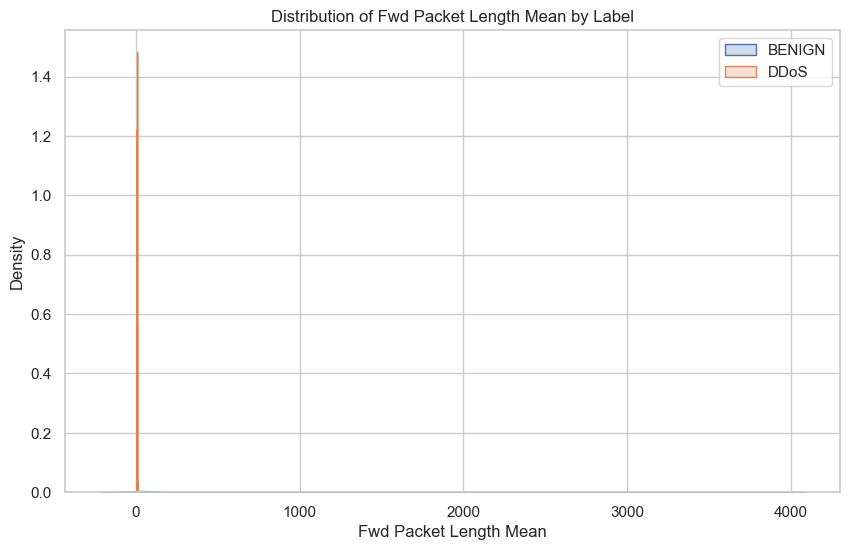

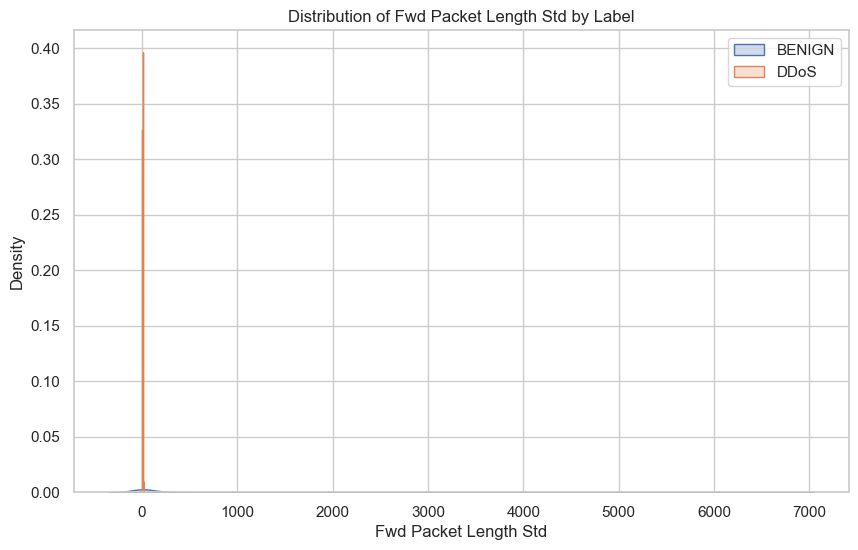

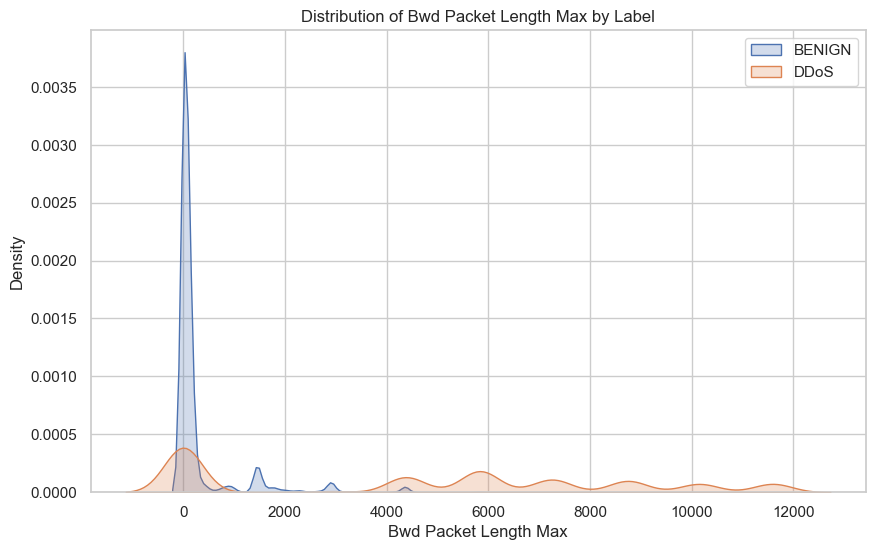

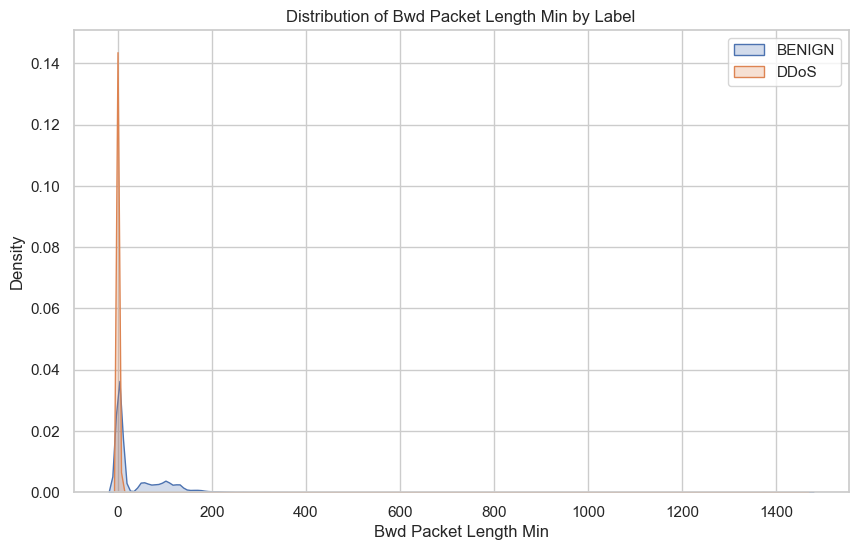

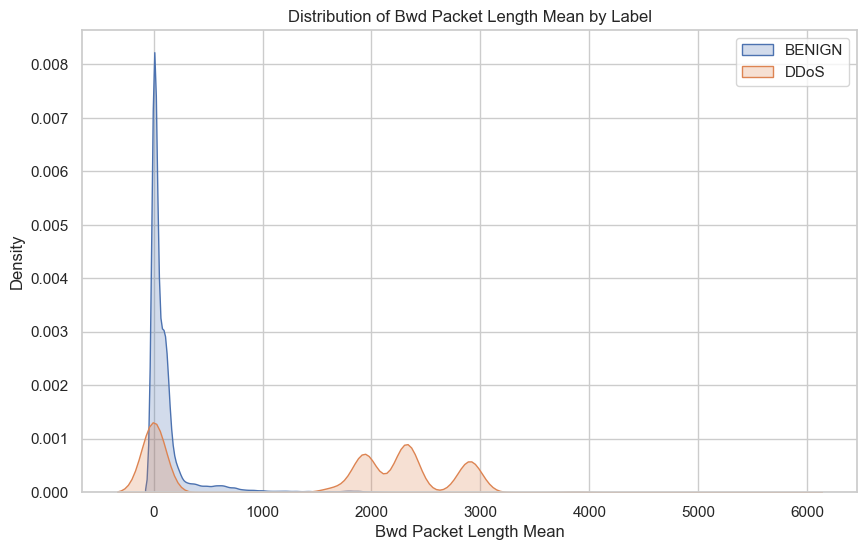

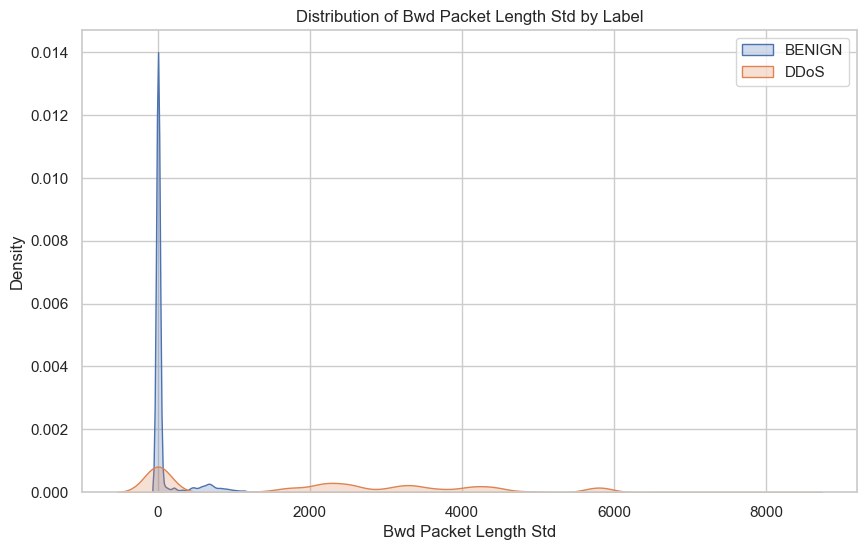

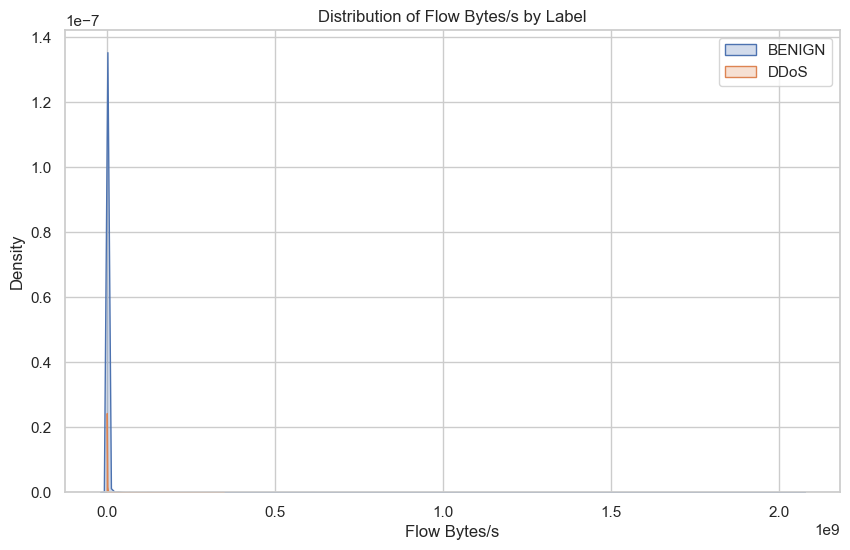

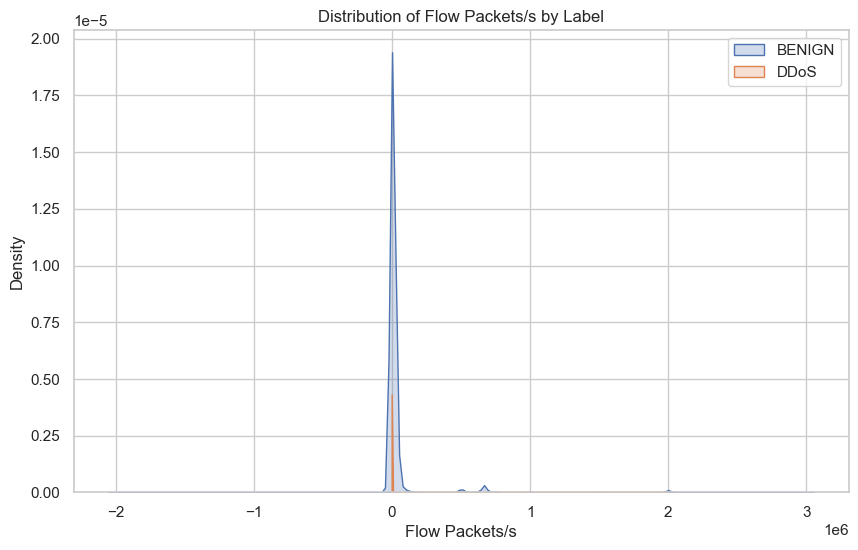

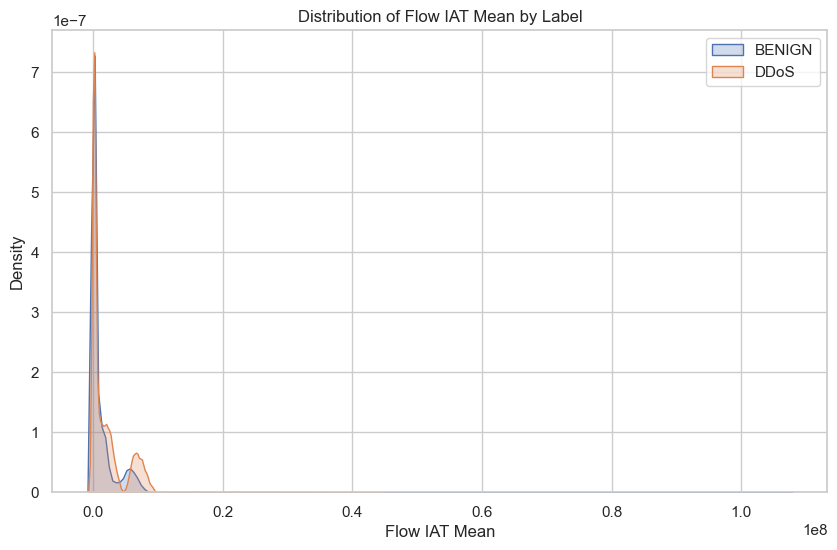

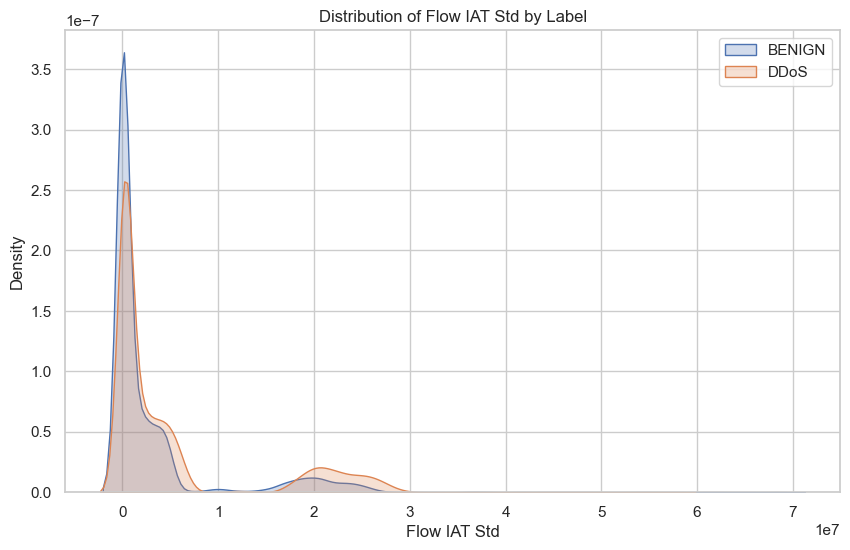

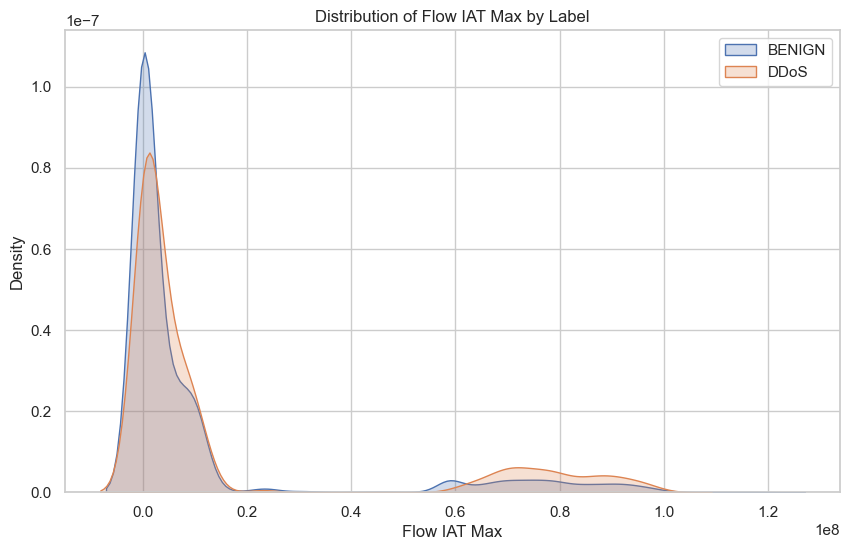

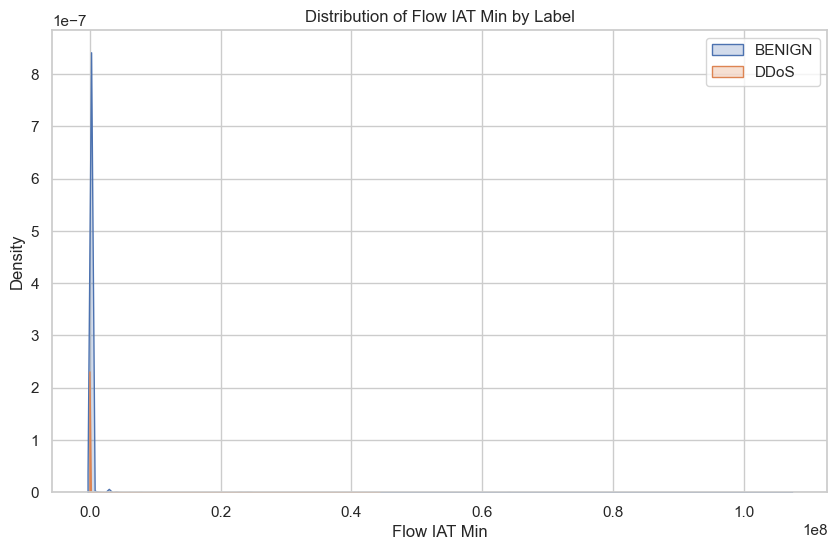

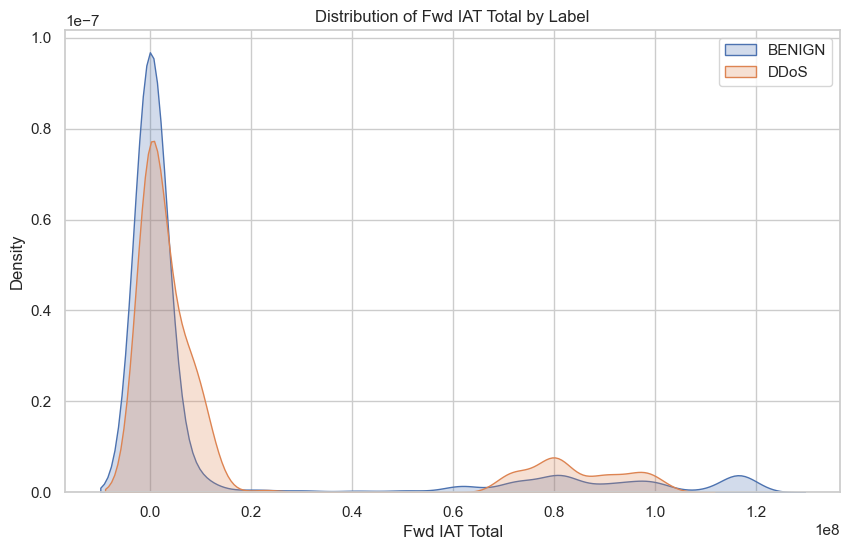

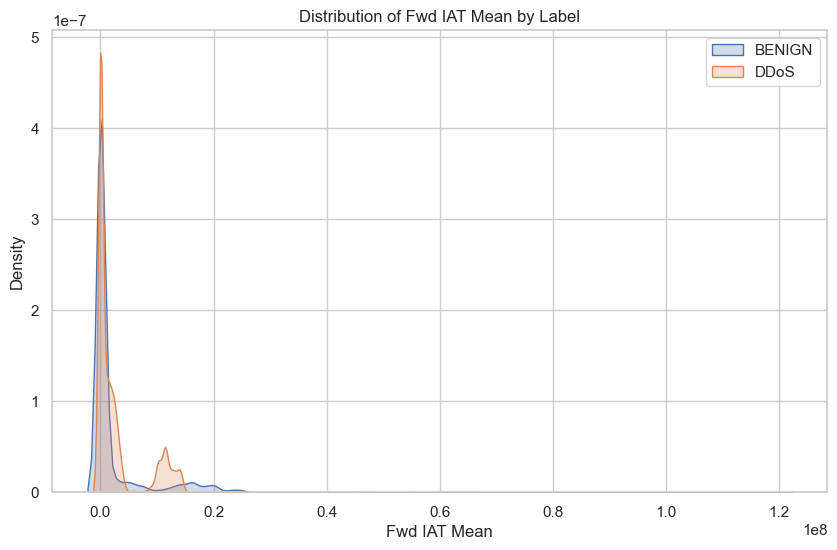

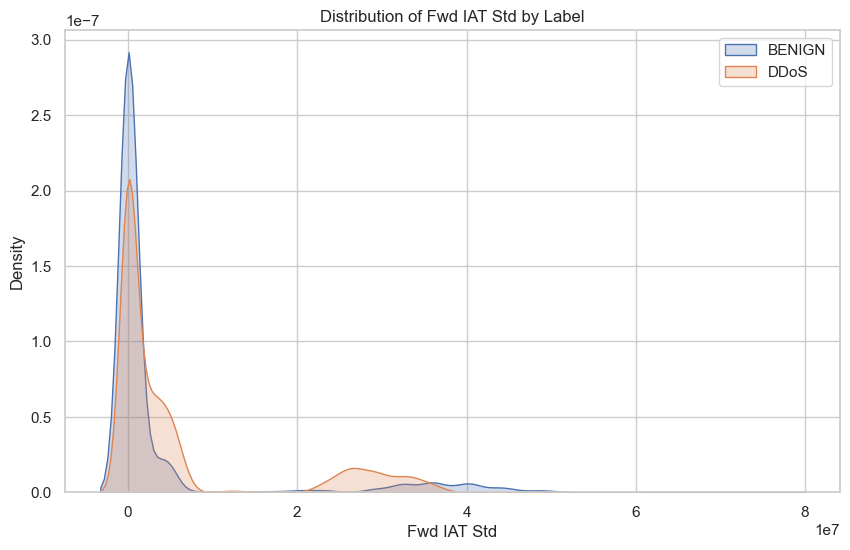

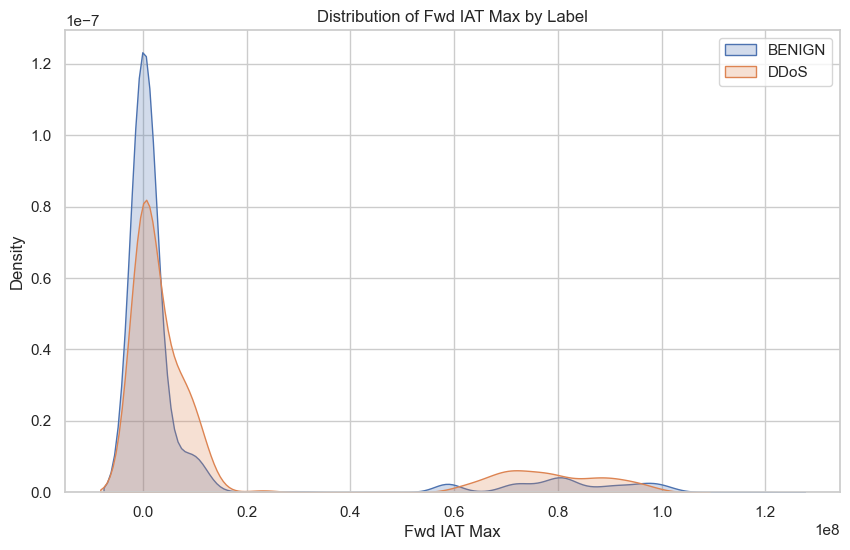

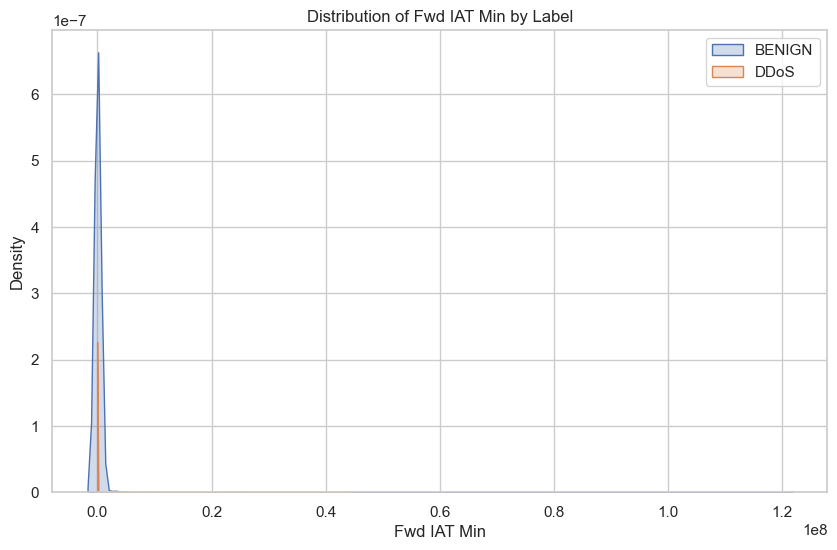

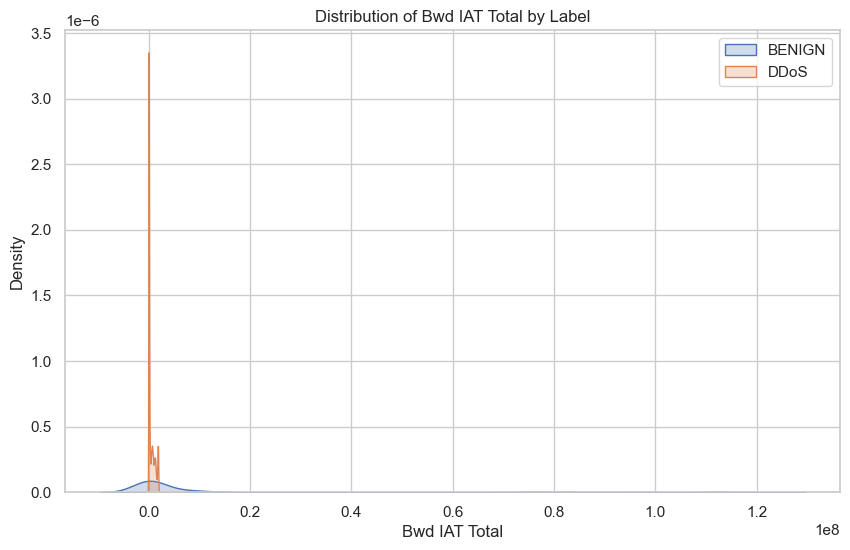

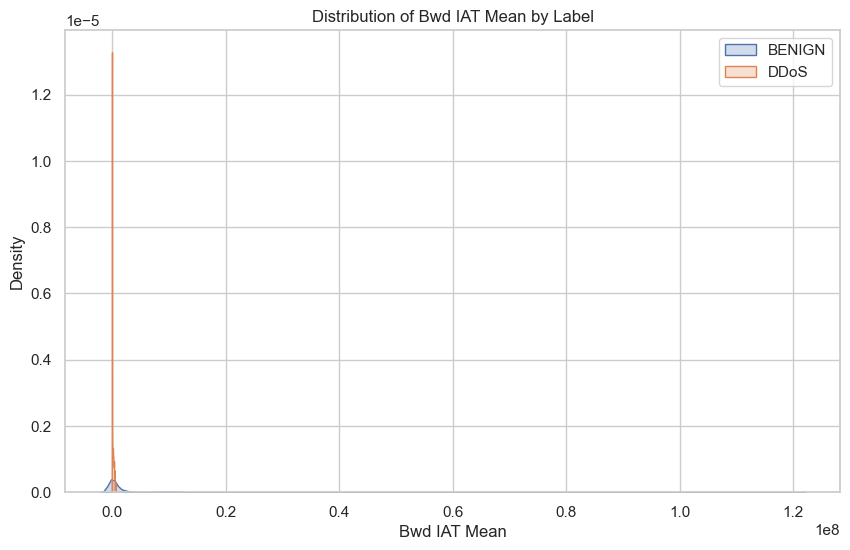

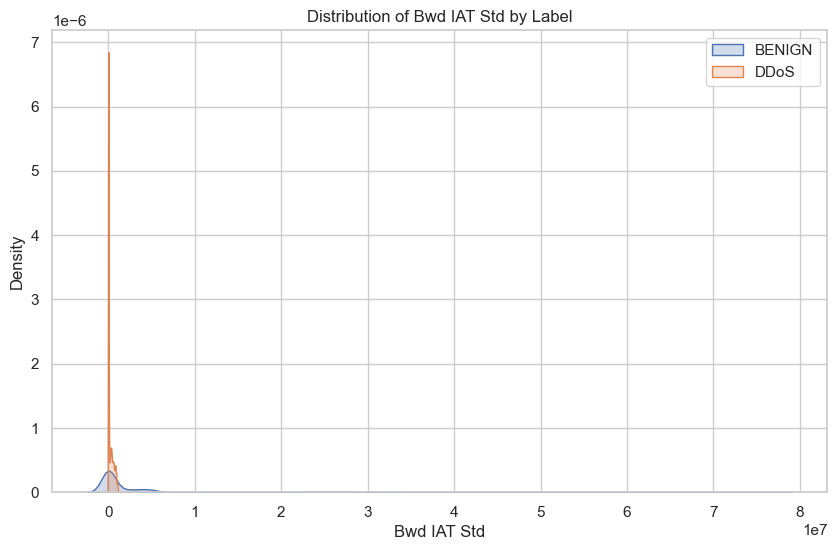

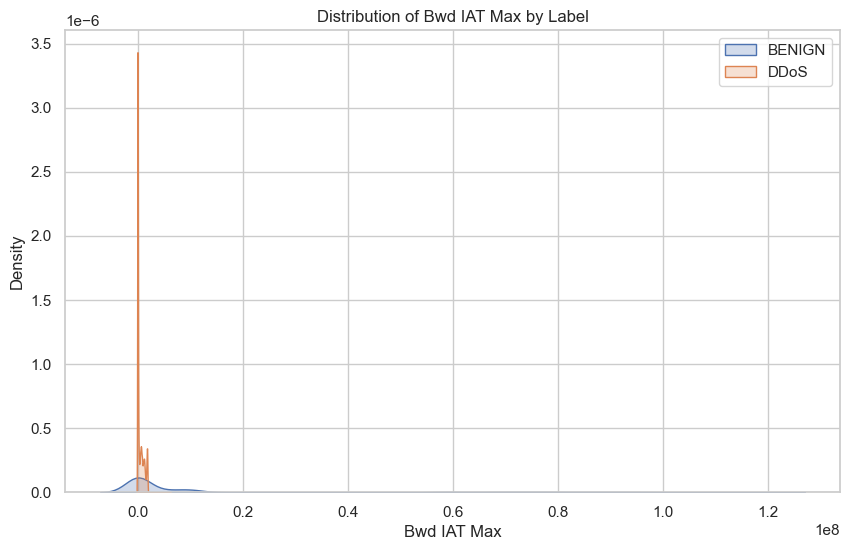

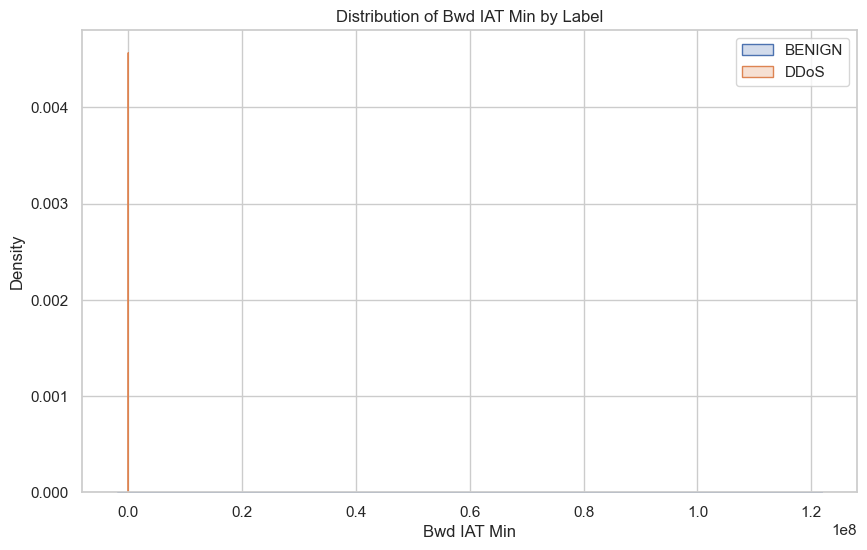

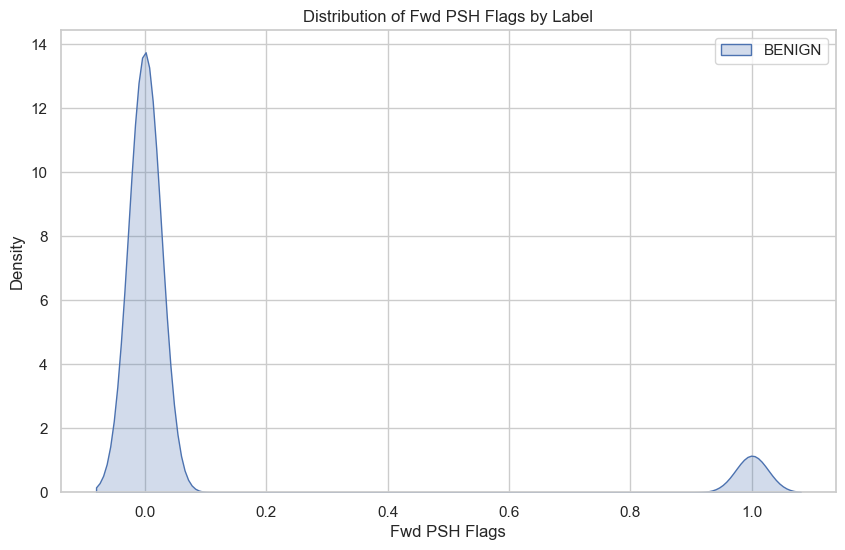

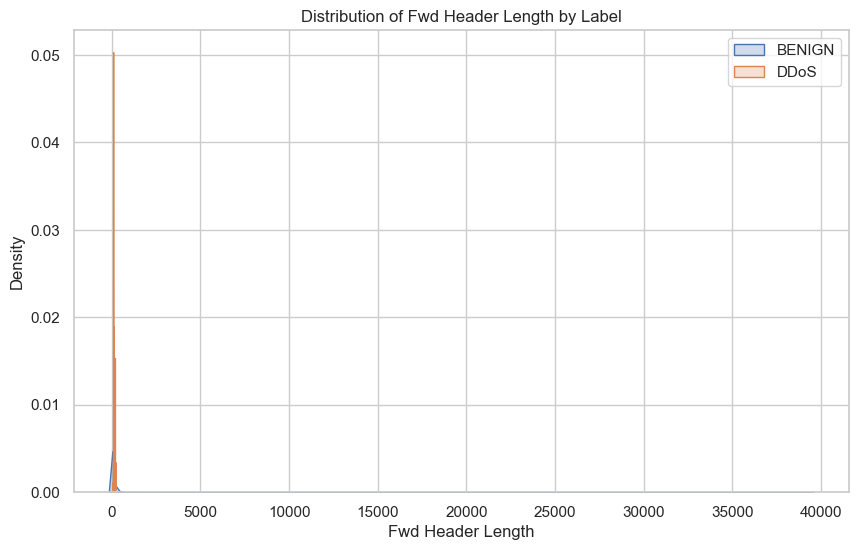

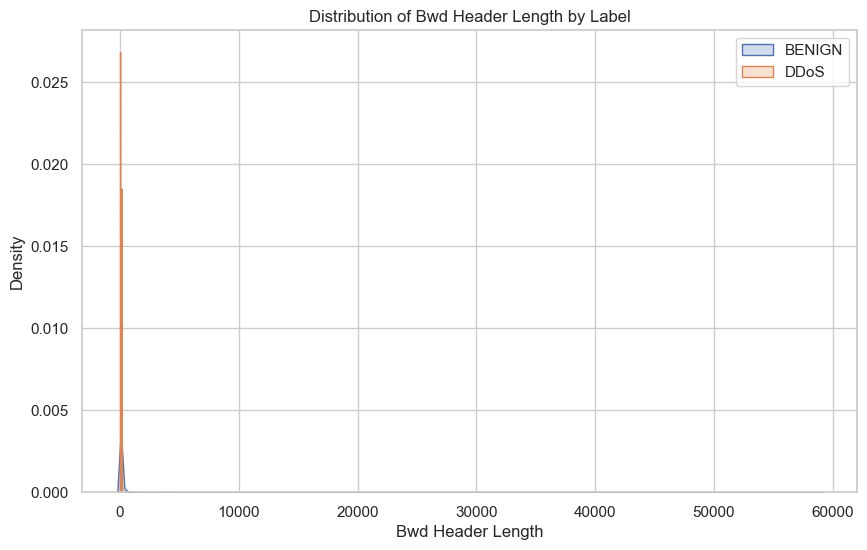

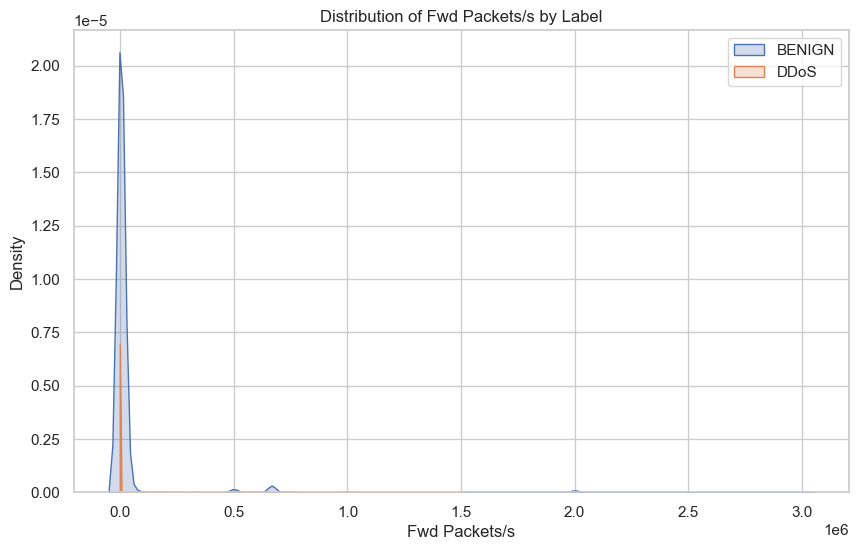

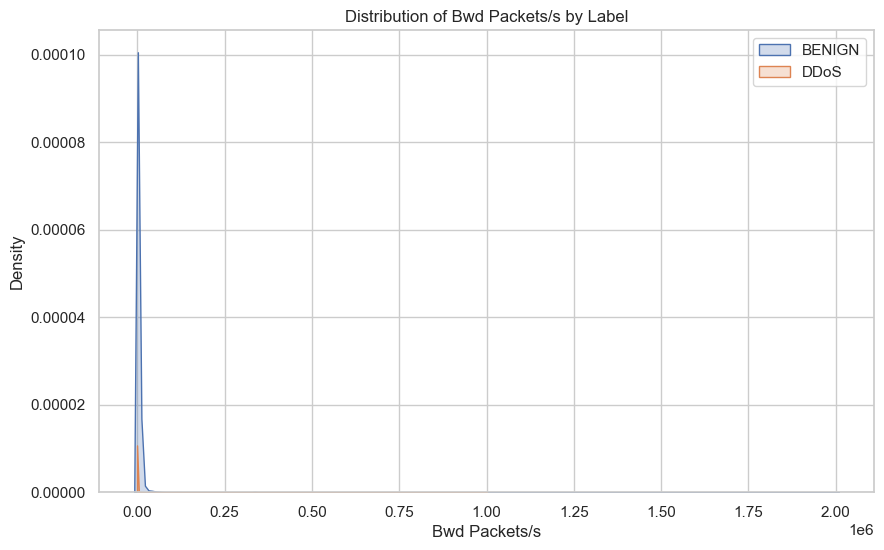

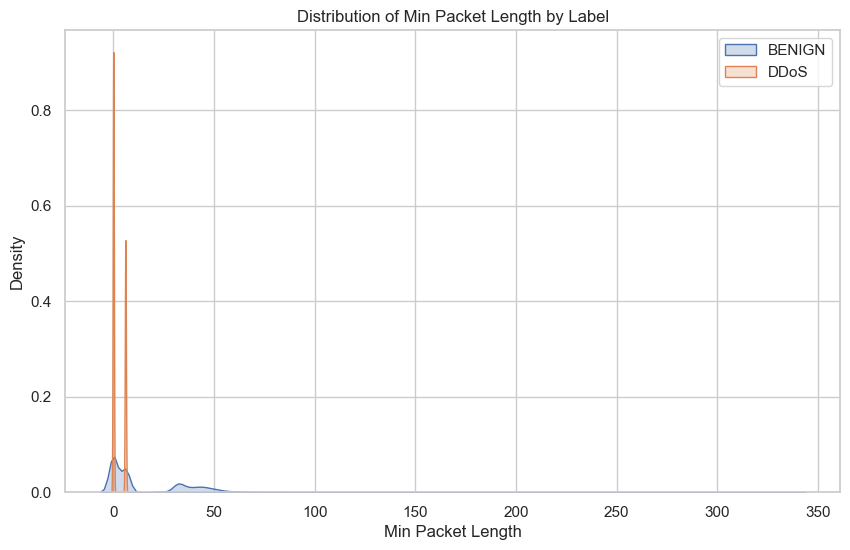

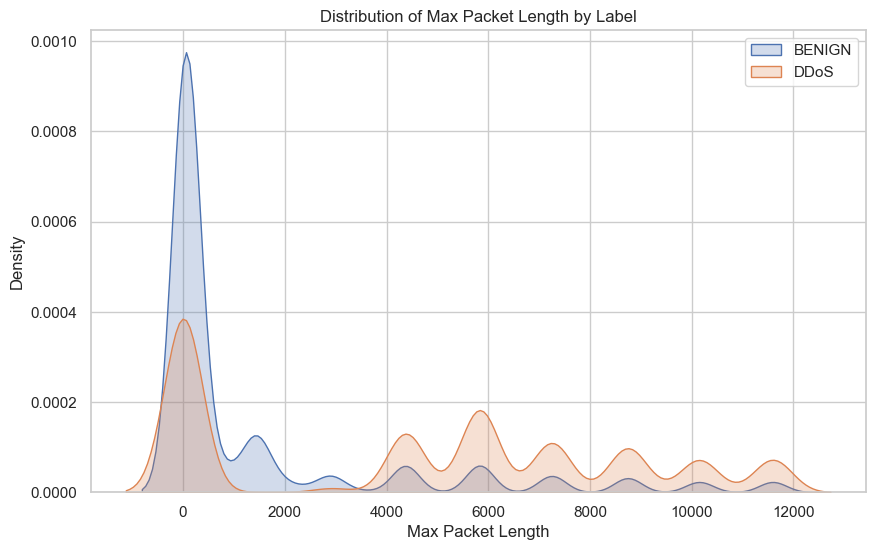

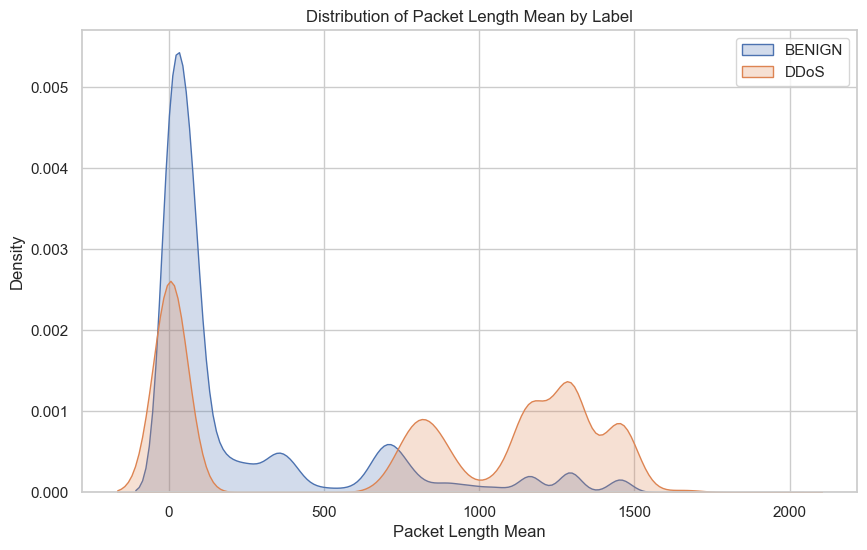

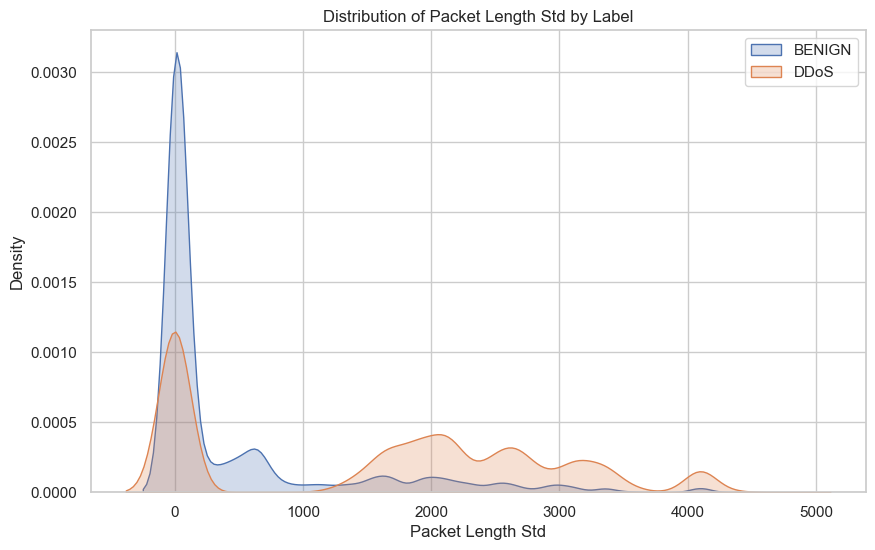

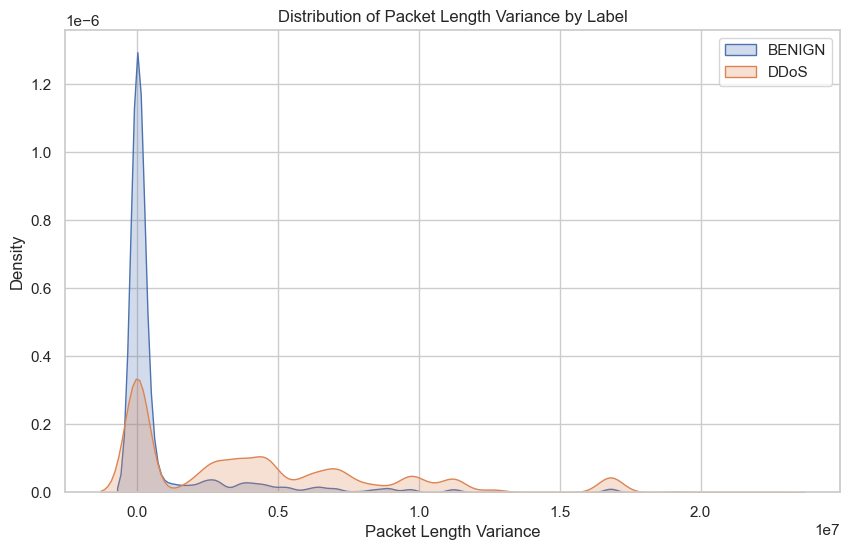

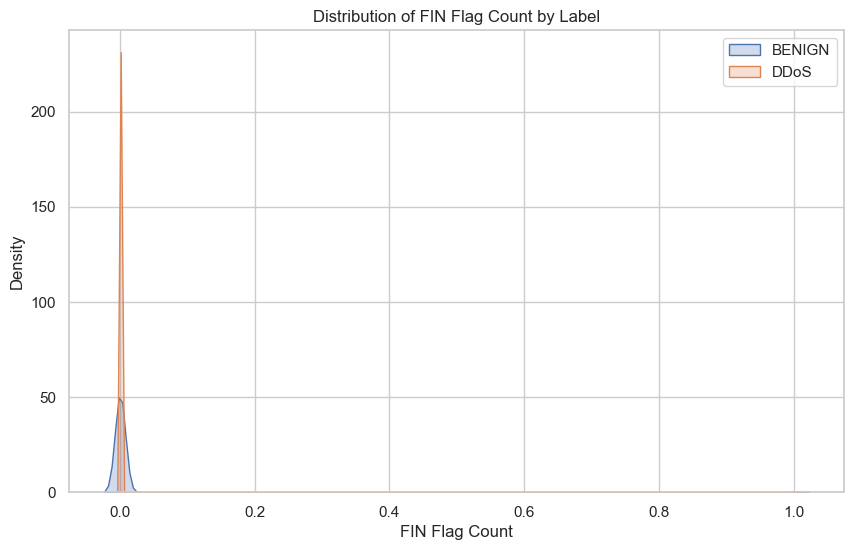

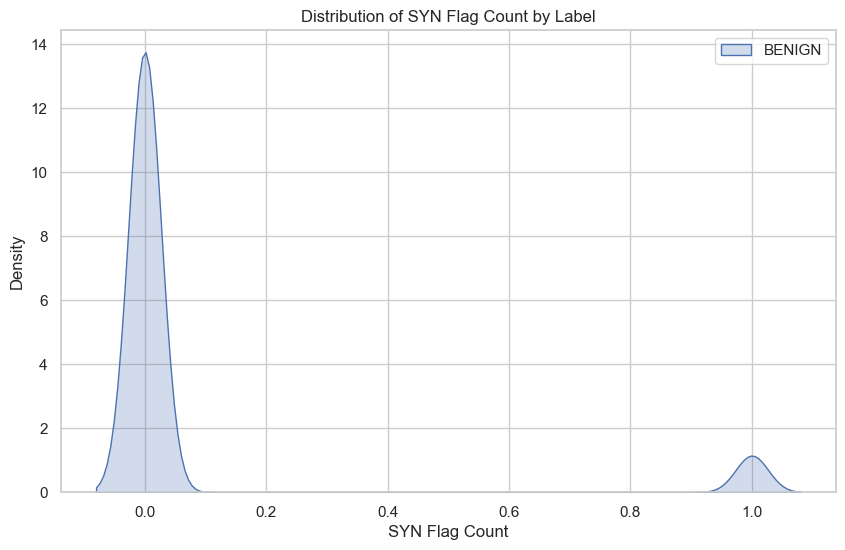

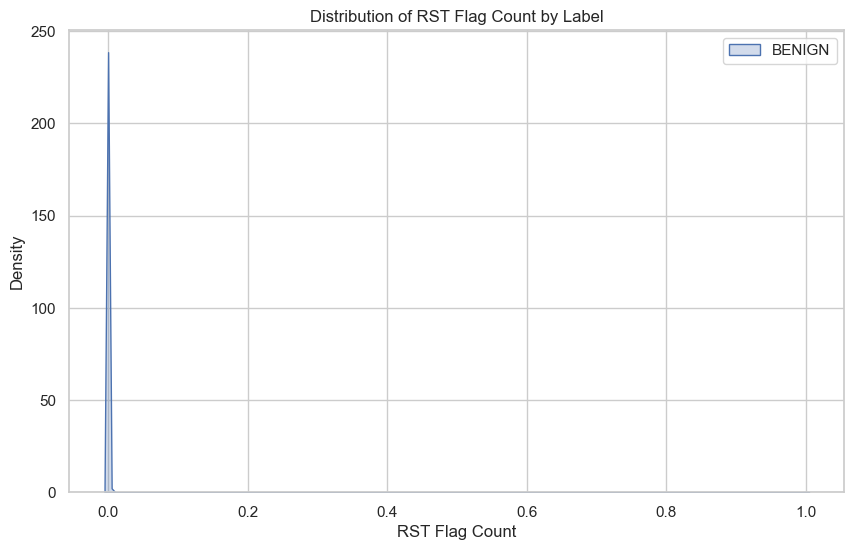

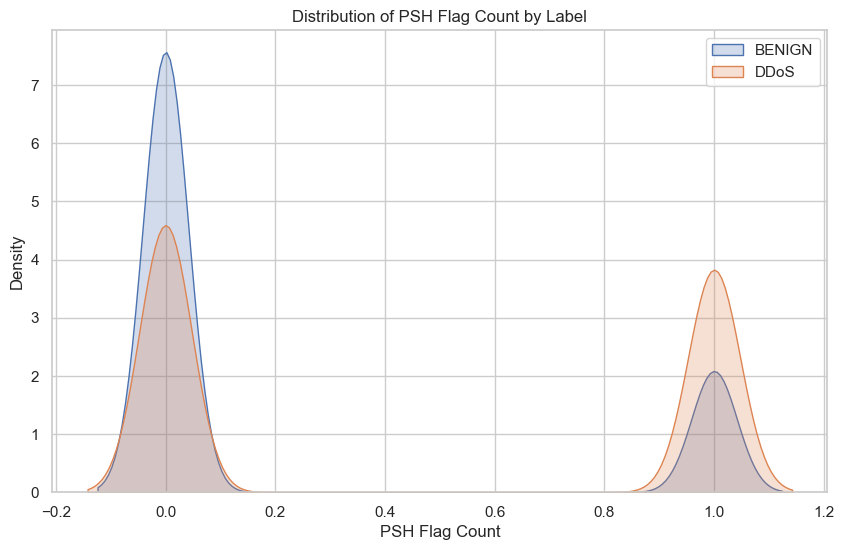

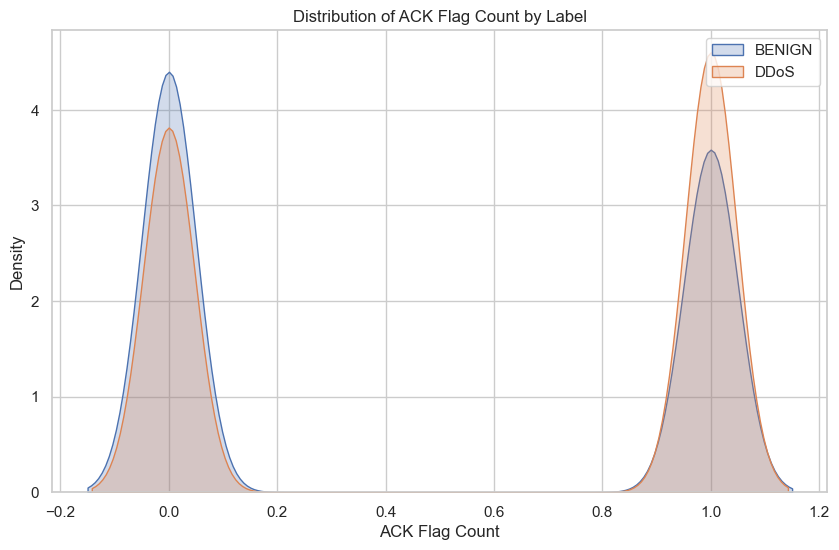

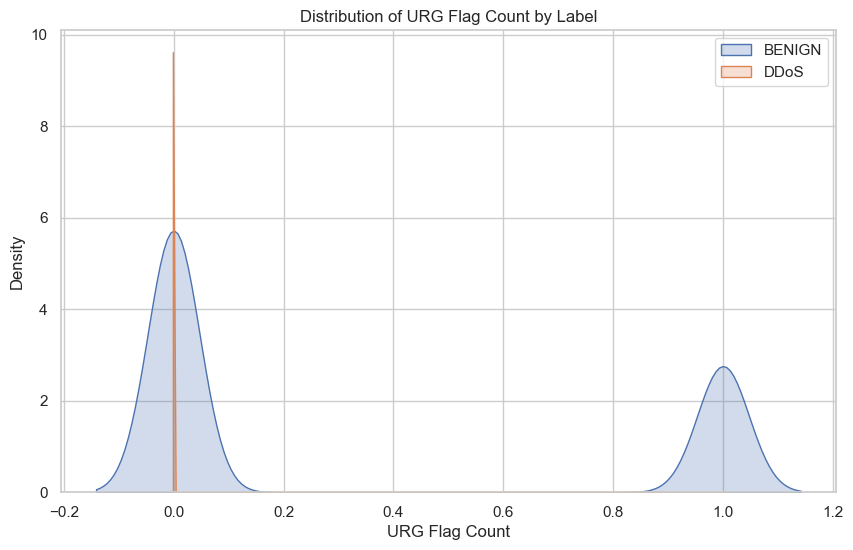

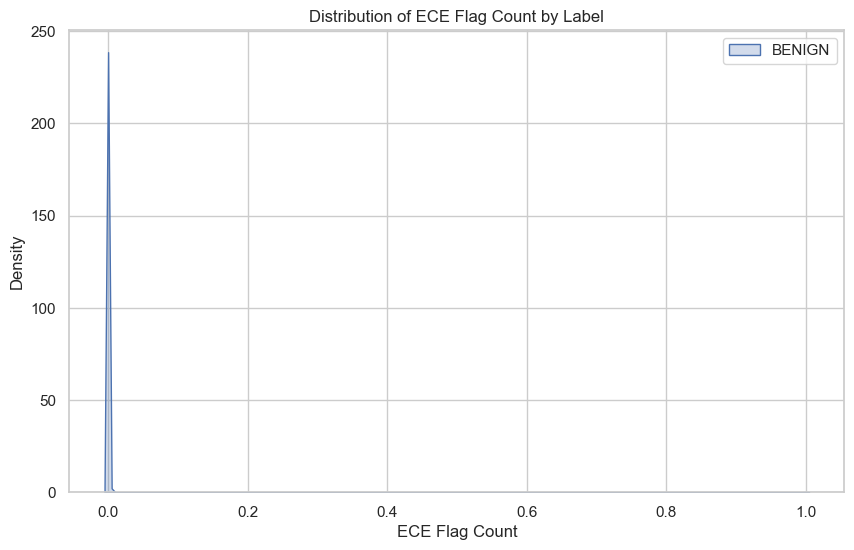

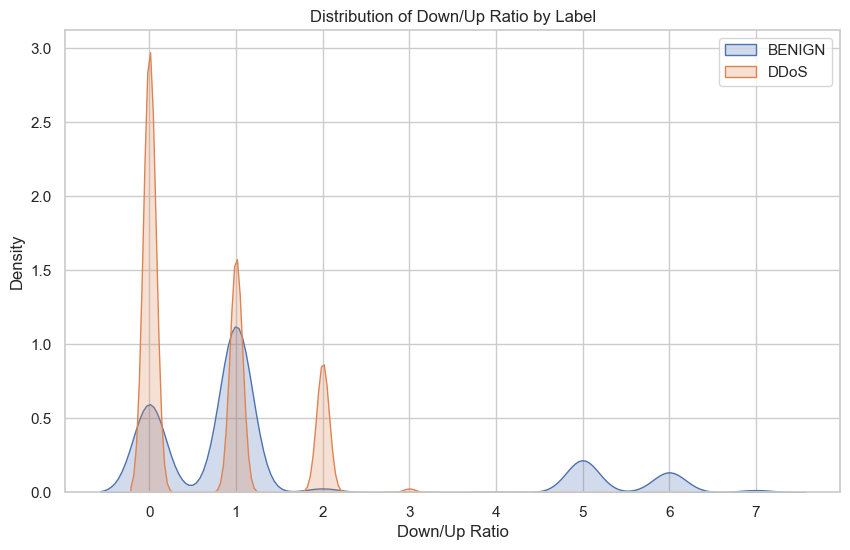

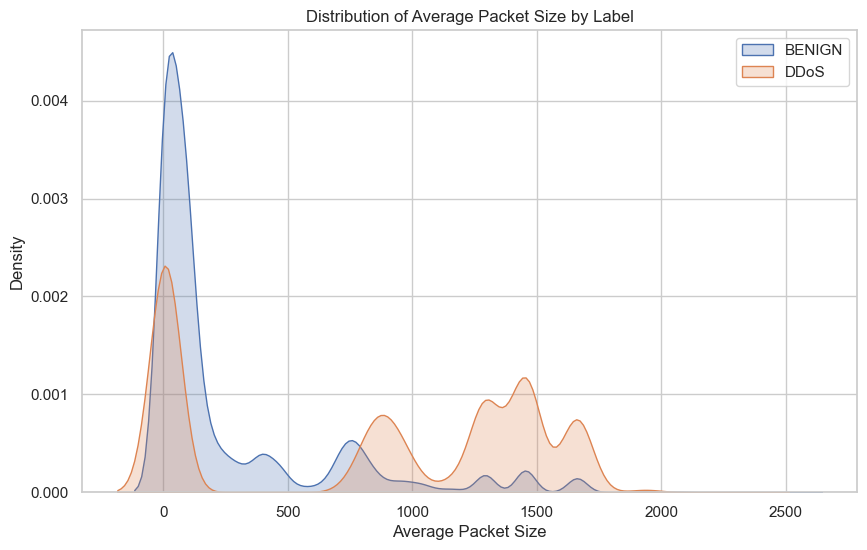

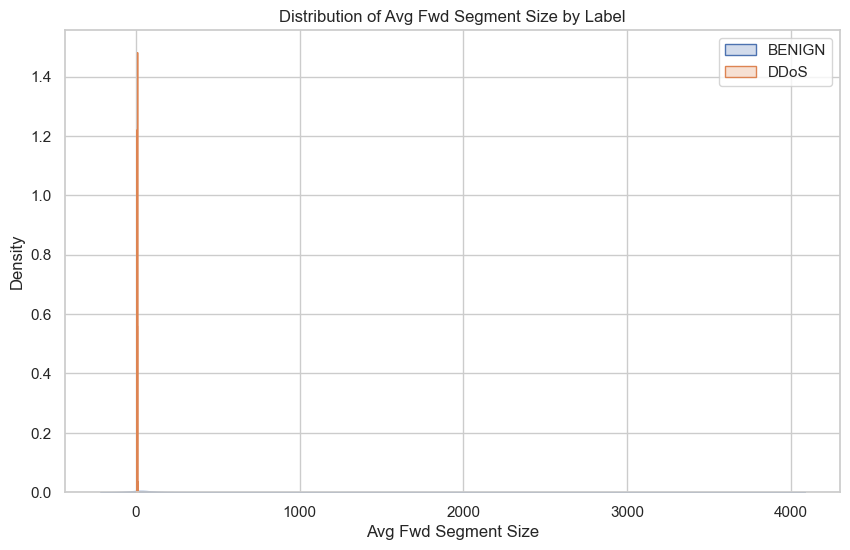

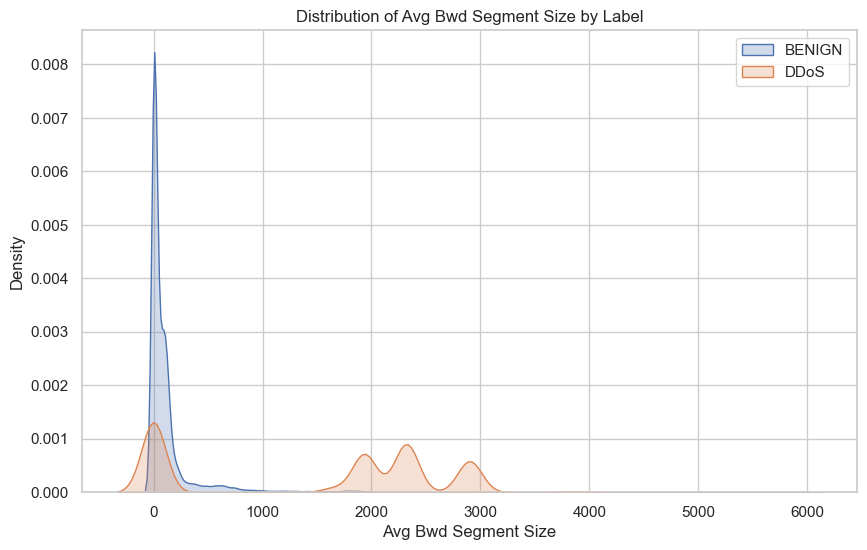

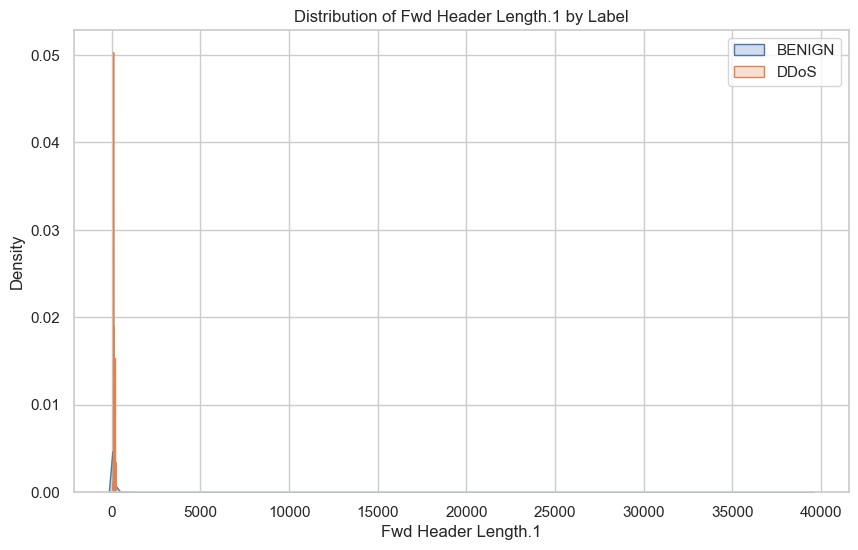

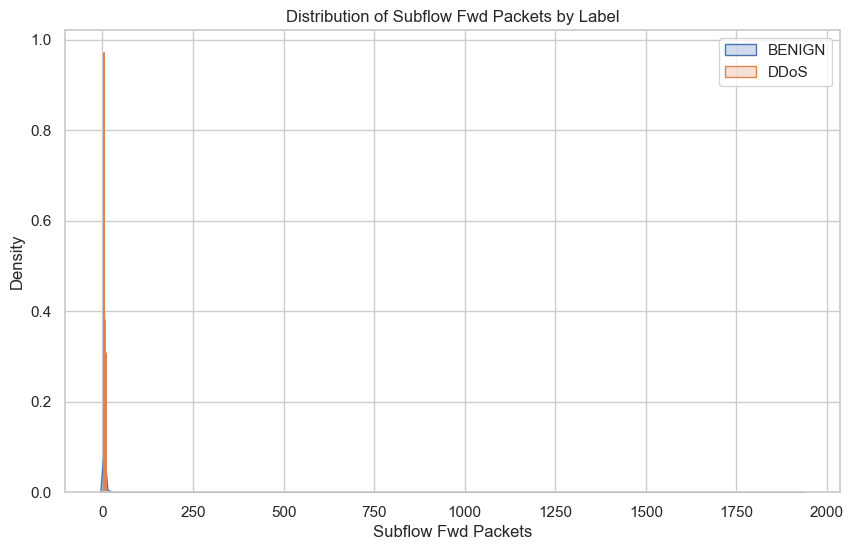

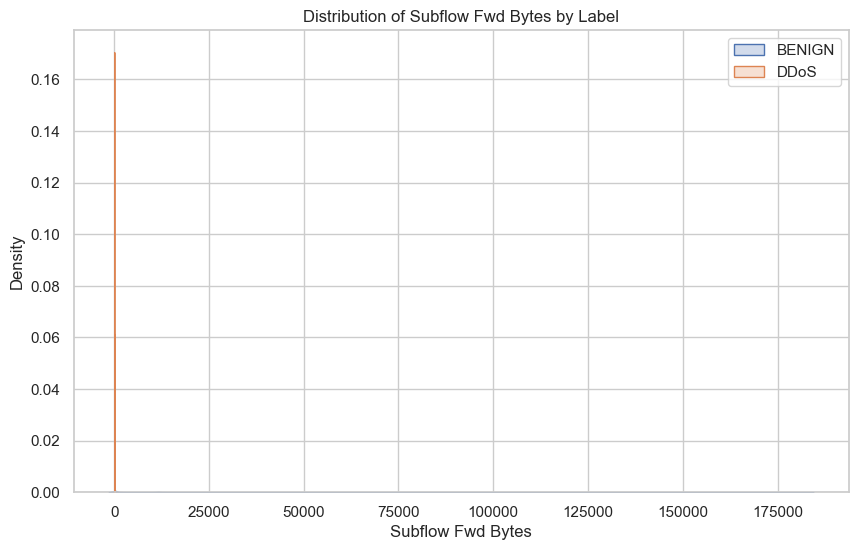

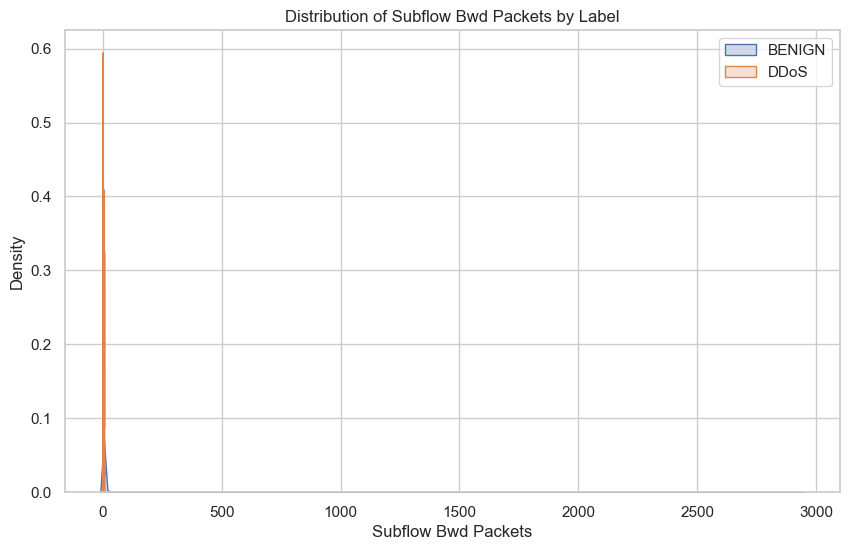

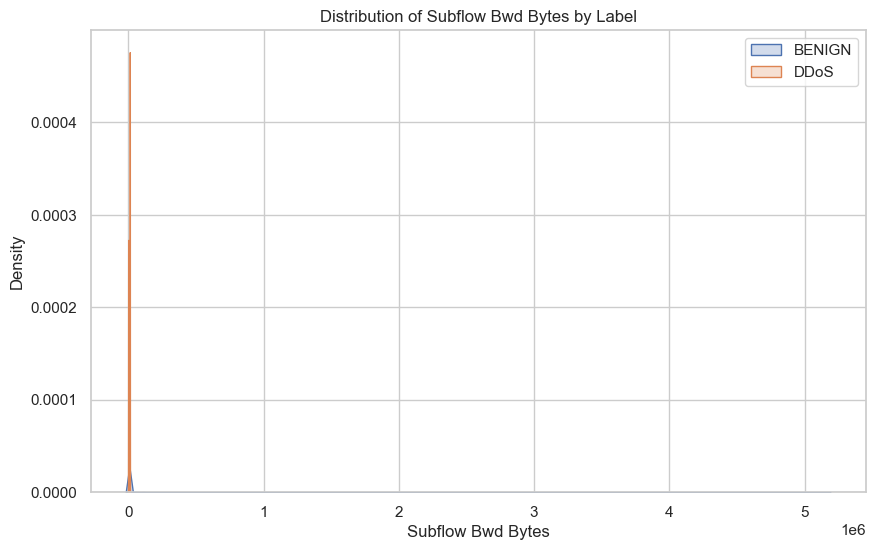

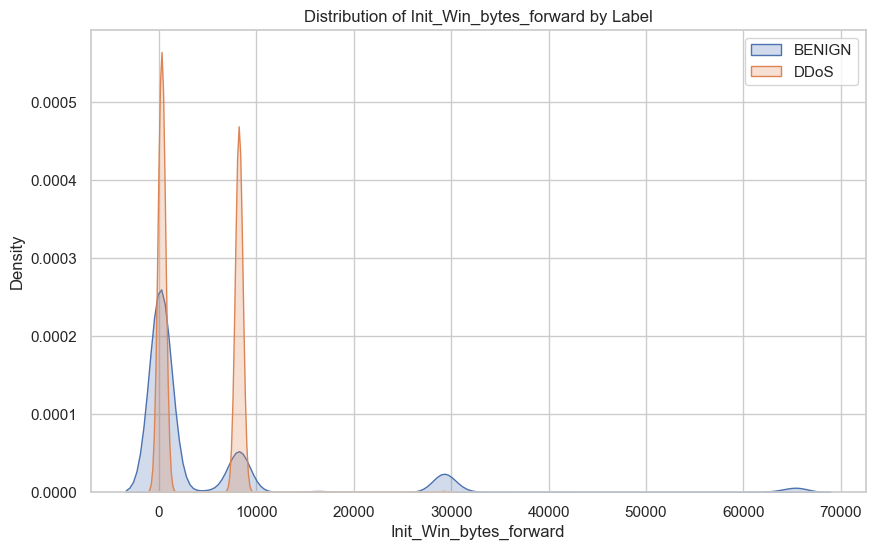

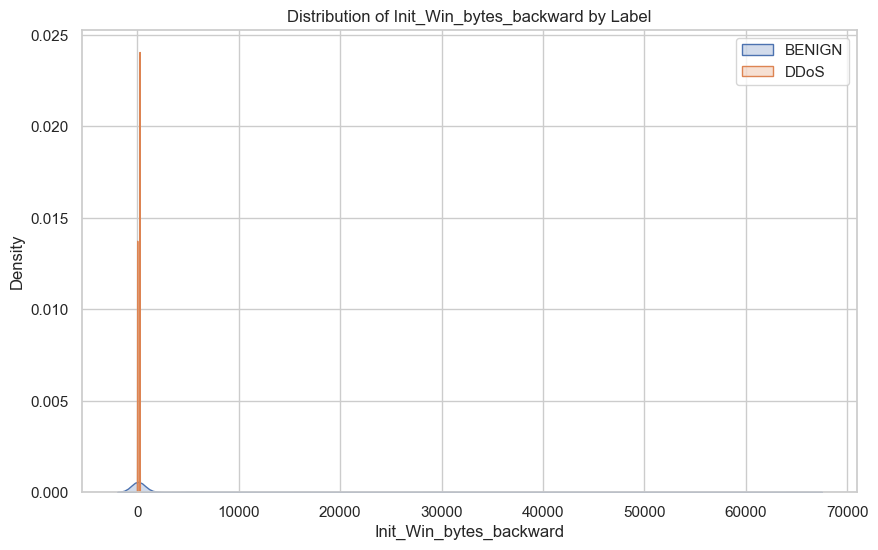

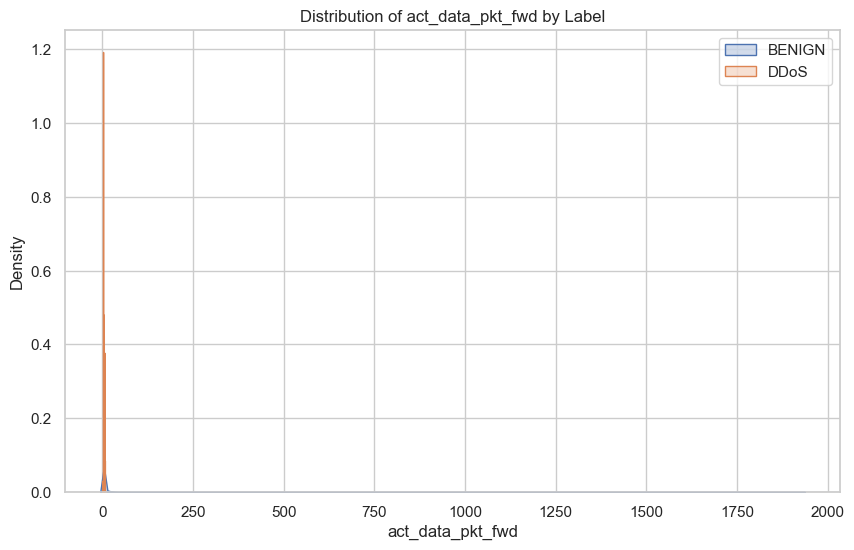

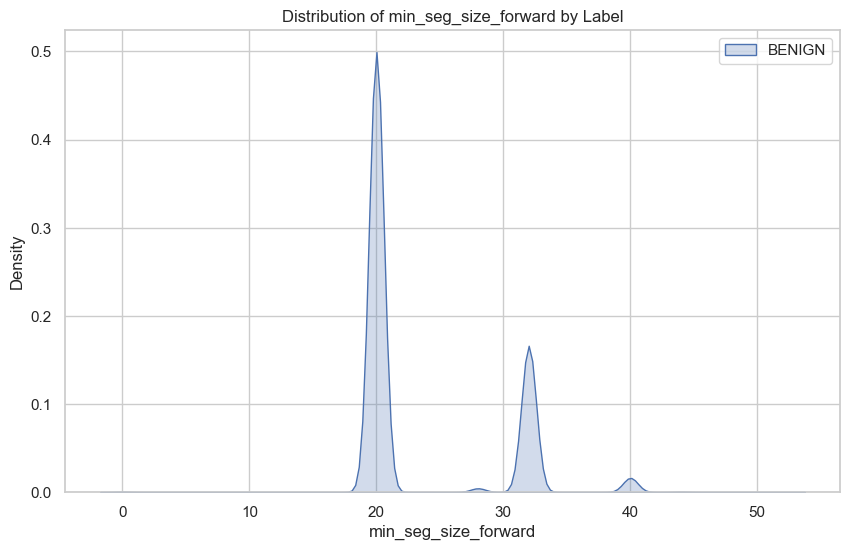

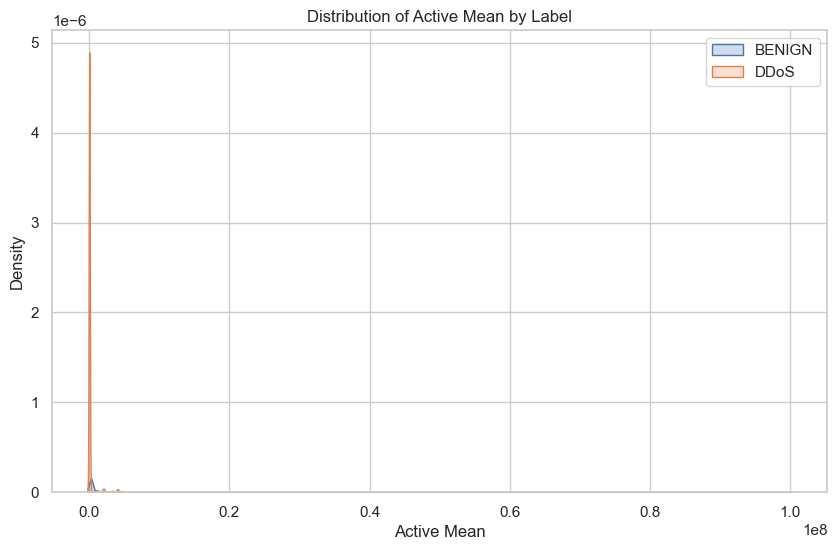

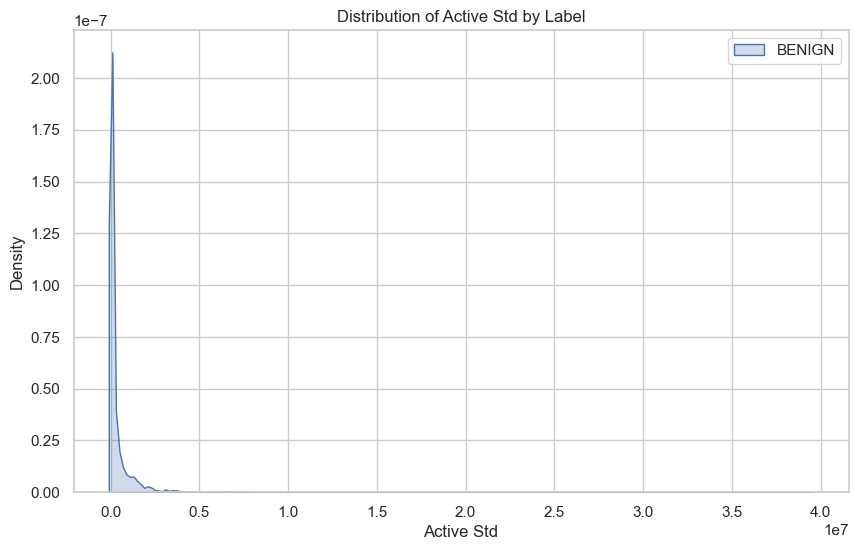

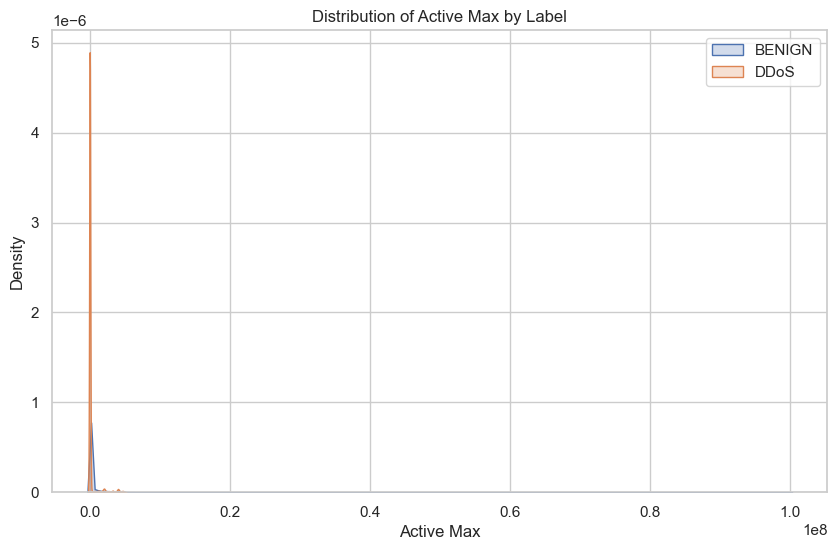

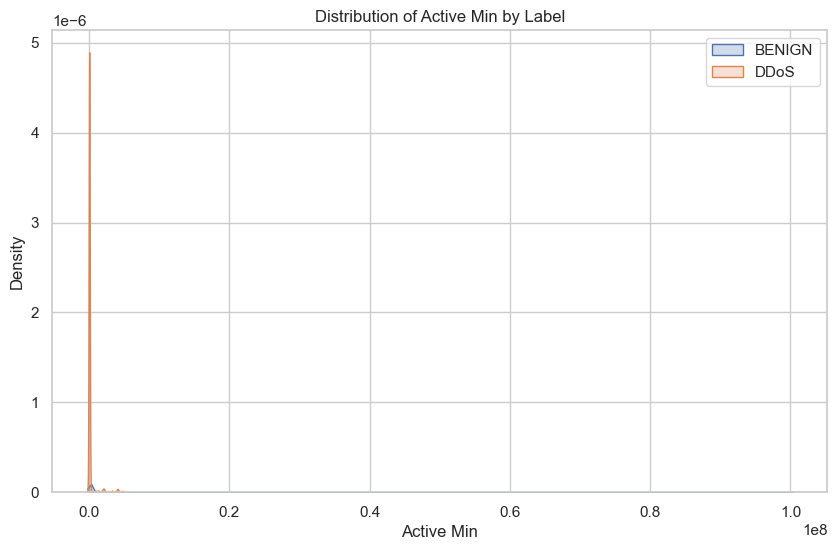

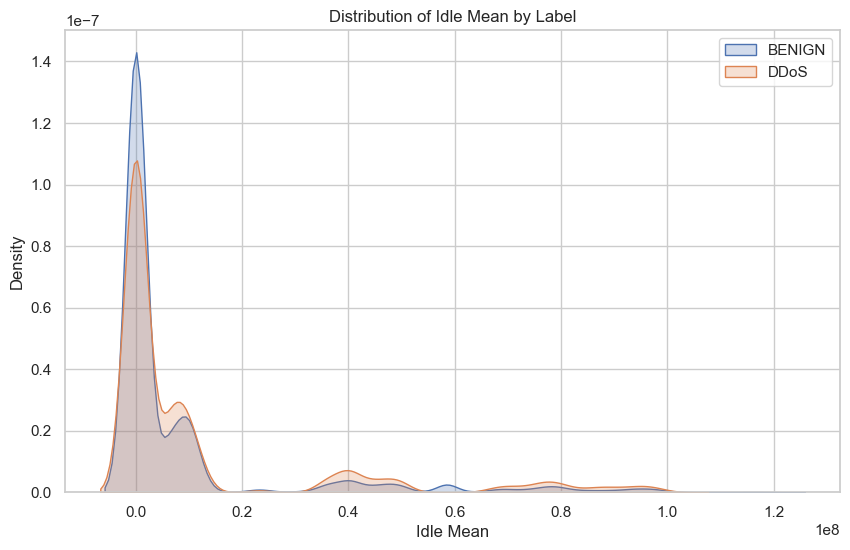

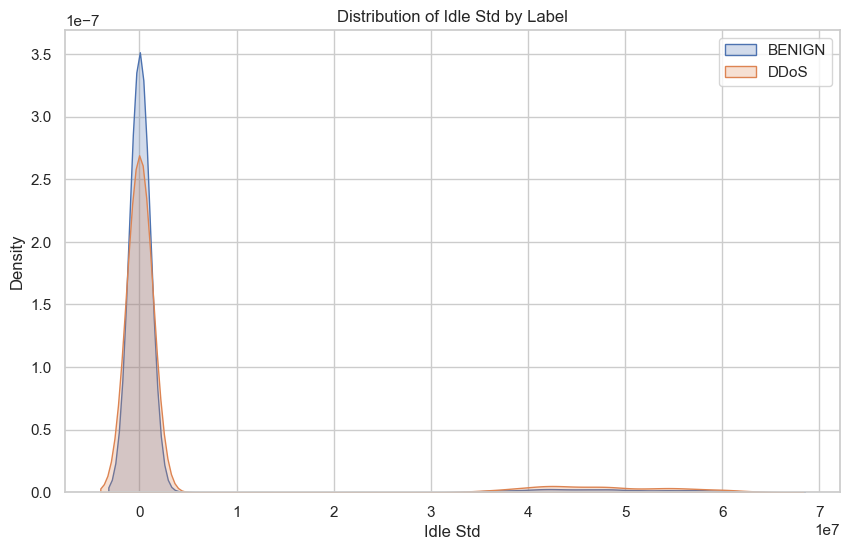

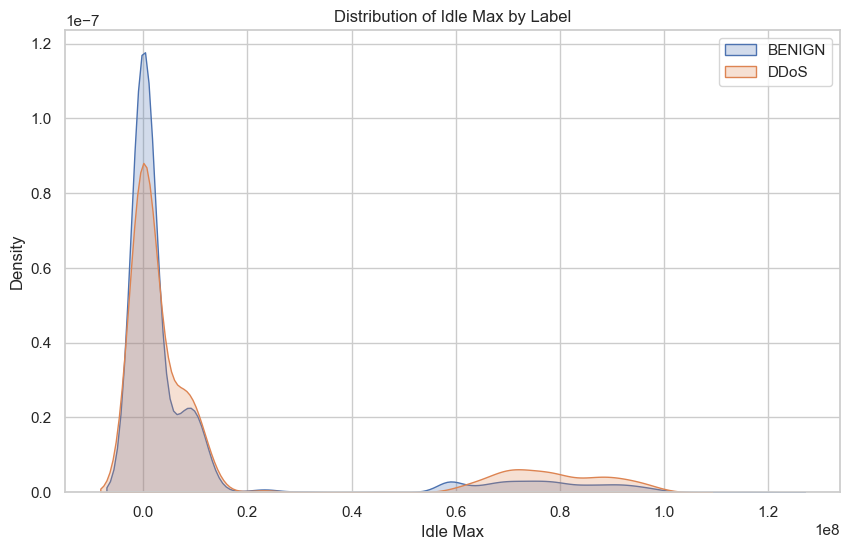

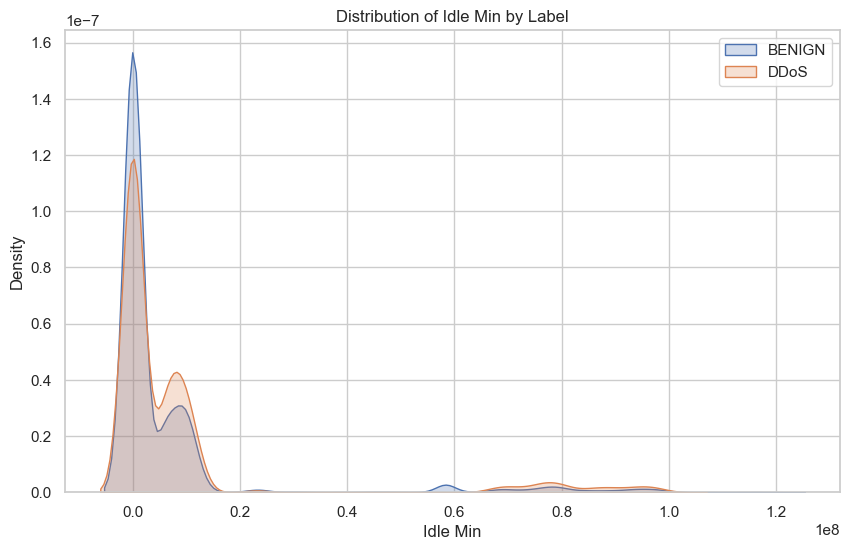

In [123]:
num_features = dataset.select_dtypes(include=['float64', 'int64']).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(dataset[feature][dataset['Label'] == 'BENIGN'], label='BENIGN', fill=True)
    sns.kdeplot(dataset[feature][dataset['Label'] == 'DDoS'], label='DDoS', fill=True)
    
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [124]:
dataset= dataset.drop('Destination Port', axis=1)

In [287]:
features = dataset.drop('Label', axis=1)
labels = dataset['Label']

In [288]:
labels= LabelEncoder().fit_transform(labels)

In [182]:
features

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                   3                  2                       0   
1                 109                  1                       1   
2                  52                  1                       1   
3                  34                  1                       1   
4                   3                  2                       0   
...               ...                ...                     ...   
225740             61                  1                       1   
225741             72                  1                       1   
225742             75                  1                       1   
225743             48                  2                       0   
225744             68                  1                       1   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                                12                            0   
1                                 6                            6   
2                                 6                            6   
3                                 6                            6   
4                                12                            0   
...                             ...                          ...   
225740                            6                            6   
225741                            6                            6   
225742                            6                            6   
225743                           12                            0   
225744                            6                            6   

        Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                           6                      6                     6.0   
1                           6                      6                     6.0   
2                           6                      6                     6.0   
3                           6                      6                     6.0   
4                           6                      6                     6.0   
...                       ...                    ...                     ...   
225740                      6                      6                     6.0   
225741                      6                      6                     6.0   
225742                      6                      6                     6.0   
225743                      6                      6                     6.0   
225744                      6                      6                     6.0   

        Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
0                         0.0                      0  ...                 1   
1                         0.0                      6  ...                 0   
2                         0.0                      6  ...                 0   
3                         0.0                      6  ...                 0   
4                         0.0                      0  ...                 1   
...                       ...                    ...  ...               ...   
225740                    0.0                      6  ...                 0   
225741                    0.0                      6  ...                 0   
225742                    0.0                      6  ...                 0   
225743                    0.0                      0  ...                 1   
225744                    0.0                      6  ...                 0   

        min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                         20          0.0         0.0           0           0   
1                         20          0.0         0.0           0           0   
2                         20          0.0         0.0           0           0   
3                         20          0.0         0.0           0           0   
4                         20          0.0         0.0      

In [220]:
features.head()

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              3                  2                       0   
1            109                  1                       1   
2             52                  1                       1   
3             34                  1                       1   
4              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6                     6.0   
1                      6                      6                     6.0   
2                      6                      6                     6.0   
3                      6                      6                     6.0   
4                      6                      6                     6.0   

   Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
0                    0.0                      0  ...                 1   
1                    0.0                      6  ...                 0   
2                    0.0                      6  ...                 0   
3                    0.0                      6  ...                 0   
4                    0.0                      0  ...                 1   

   min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                    20          0.0         0.0           0           0   
1                    20          0.0         0.0           0           0   
2                    20          0.0         0.0           0           0   
3                    20          0.0         0.0           0           0   
4                    20          0.0         0.0           0           0   

   Idle Mean  Idle Std  Idle Max  Idle Min  
0        0.0       0.0         0         0  
1        0.0       0.0         0         0  
2        0.0       0.0         0         0  
3        0.0       0.0         0         0  
4        0.0       0.0         0         0  

[5 rows x 67 columns]

In [184]:
labels

array([0, 0, 0, ..., 0, 0, 0])

## Train Test Split

In [185]:
dataset.head()

Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              3                  2                       0   
1            109                  1                       1   
2             52                  1                       1   
3             34                  1                       1   
4              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6                     6.0   
1                      6                      6                     6.0   
2                      6                      6                     6.0   
3                      6                      6                     6.0   
4                      6                      6                     6.0   

   Fwd Packet Length Std  Bwd Packet Length Max  ...  min_seg_size_forward  \
0                    0.0                      0  ...                    20   
1                    0.0                      6  ...                    20   
2                    0.0                      6  ...                    20   
3                    0.0                      6  ...                    20   
4                    0.0                      0  ...                    20   

   Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
0          0.0         0.0           0           0        0.0       0.0   
1          0.0         0.0           0           0        0.0       0.0   
2          0.0         0.0           0           0        0.0       0.0   
3          0.0         0.0           0           0        0.0       0.0   
4          0.0         0.0           0           0        0.0       0.0   

   Idle Max  Idle Min   Label  
0         0         0  BENIGN  
1         0         0  BENIGN  
2         0         0  BENIGN  
3         0         0  BENIGN  
4         0         0  BENIGN  

[5 rows x 68 columns]

In [289]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [222]:
len(X_train), len(y_train)

(158018, 158018)

In [223]:
X_train.head()

Flow Duration  Total Fwd Packets  Total Backward Packets  \
25876         8076307                  4                       0   
116520       88552329                  8                       4   
150470         793028                  3                       5   
98295           35104                  3                       4   
168134      100341221                  8                       5   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
25876                            24                            0   
116520                           56                        11601   
150470                           26                        11601   
98295                            26                        11601   
168134                           56                        11601   

        Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
25876                       6                      6                6.000000   
116520                     20                      0                7.000000   
150470                     20                      0                8.666667   
98295                      20                      0                8.666667   
168134                     20                      0                7.000000   

        Fwd Packet Length Std  Bwd Packet Length Max  ...  act_data_pkt_fwd  \
25876                0.000000                      0  ...                 3   
116520               5.656854                   8760  ...                 6   
150470              10.263203                   5840  ...                 2   
98295               10.263203                   5840  ...                 2   
168134               5.656854                   4380  ...                 6   

        min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
25876                     20       1199.0         0.0        1199        1199   
116520                    20        824.0         0.0         824         824   
150470                    20          0.0         0.0           0           0   
98295                     20          0.0         0.0           0           0   
168134                    20        926.0         0.0         926         926   

         Idle Mean    Idle Std  Idle Max  Idle Min  
25876    8075108.0         0.0   8075108   8075108  
116520  43800000.0  52000000.0  80600000   7080935  
150470         0.0         0.0         0         0  
98295          0.0         0.0         0         0  
168134  49800000.0  58700000.0  91300000   8248859  

[5 rows x 67 columns]

In [224]:
X_train.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 

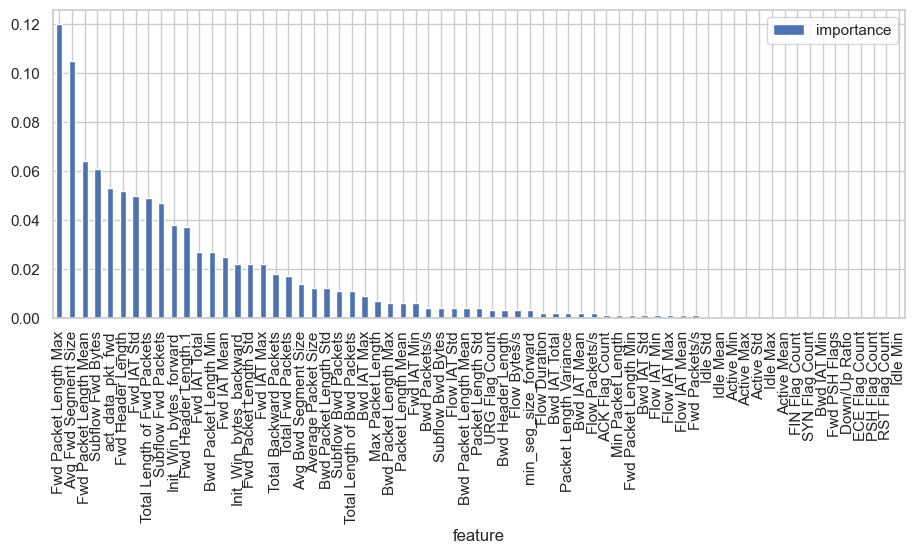

In [225]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs= -1);

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [226]:
from sklearn.metrics import classification_report , confusion_matrix

predict = rfc.predict(X_test)
#y_predicted = np.round(predict)
#Confusion_Matrix = ConfusionMatrix(y_val, y_predicted)
#print(Confusion_Matrix)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14655
           1       1.00      1.00      1.00     19206

    accuracy                           1.00     33861
   macro avg       1.00      1.00      1.00     33861
weighted avg       1.00      1.00      1.00     33861



In [227]:
print(confusion_matrix(y_test, predict))

[[14653     2]
 [    7 19199]]


In [228]:
#Recursive feature elimination
from sklearn.feature_selection import RFE, RFECV
import itertools


# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)


In [229]:
rfe = rfe.fit(X_train, y_train)

In [230]:
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]



In [231]:
print(selected_features)

a = [i[0] for i in feature_map]
X_train = X_train.iloc[:,a]
X_test = X_test.iloc[:,a]

['Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd Header Length', 'Packet Length Mean', 'Average Packet Size', 'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd']


In [236]:
print(len(selected_features))

a = [i[0] for i in feature_map]
X_train = X_train.iloc[:,a]
X_test = X_test.iloc[:,a]

20


In [237]:
X_train

Total Fwd Packets  Total Length of Fwd Packets  Fwd Packet Length Max  \
25876                   4                           24                      6   
116520                  8                           56                     20   
150470                  3                           26                     20   
98295                   3                           26                     20   
168134                  8                           56                     20   
...                   ...                          ...                    ...   
119882                  1                           45                     45   
103697                  5                        11607                  10220   
131935                  8                           56                     20   
146870                  6                        11607                  10135   
121961                  7                           50                     20   

        Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Min  \
25876                 6.000000               0.000000                      0   
116520                7.000000               5.656854                      0   
150470                8.666667              10.263203                      0   
98295                 8.666667              10.263203                      0   
168134                7.000000               5.656854                      0   
...                        ...                    ...                    ...   
119882               45.000000               0.000000                     94   
103697             2321.400000            4455.182578                      0   
131935                7.000000               5.656854                      0   
146870             1934.500000            4059.461922                      6   
121961                7.142857               6.094494                      0   

        Bwd Packet Length Mean  Fwd IAT Total   Fwd IAT Std  Fwd IAT Max  \
25876                     0.00        8076307  4.661820e+06      8075108   
116520                 2900.25       87700000  3.010000e+07     80600000   
150470                 2320.20          13616  9.015611e+03        13183   
98295                  2900.25          22984  1.624366e+04        22978   
168134                 2320.20       99600000  3.410000e+07     91300000   
...                        ...            ...           ...          ...   
119882                   94.00              0  0.000000e+00            0   
103697                    7.00        9991501  4.941854e+06      9910478   
131935                 1933.50       90900000  3.130000e+07     83600000   
146870                   13.00        1315292  5.875849e+05      1314162   
121961                 2901.75        8036537  2.439559e+06      6048244   

        Fwd Header Length  Packet Length Mean  Average Packet Size  \
25876                  80            6.000000             7.500000   
116520                172          897.153846           971.916667   
150470                 72         1291.888889          1453.375000   
98295                  72         1453.375000          1661.000000   
168134                172          833.071429           897.153846   
...                   ...                 ...                  ...   
119882                 32           61.333333            92.000000   
103697                112          833.500000           897.615385   
131935                172          777.533333           833.071429   
146870                144         1292.555556          1454.125000   
121961                152          971.916667          1060.272727   

        Avg Fwd Segment Size  Fwd Header Length.1  Subflow Fwd Packets  \
25876               6.000000                   80                    4   
116520              7.000000                  172                    8   
150470              8.666667                   72                    3   
98295               8.66

In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd
import time
import joblib
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
import numpy as np

seed = 42
np.random.seed(seed)

# Define a dictionary of classifiers
classifiers = {  "Decision Tree Classifier": DecisionTreeClassifier(),
                "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
                "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5), 
                "Logistic Regression": LogisticRegression(max_iter=1000),
               "Random Forest": RandomForestClassifier(n_jobs=-1),
               "SVM":SVC()
                }

# Initialize a DataFrame to store model evaluation metrics
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_recall', 'avg_precision',  'avg_f1',  'avg_matthew_corcoef', 'avg_roc_auc'])

# Define a scorer dictionary
scorer = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score, average='weighted'),
    'recall_score': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'matthew_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc_score': make_scorer(roc_auc_score, average='weighted')
}

# Dictionary to store the best models
best_models = {}

# Loop through each classifier in the dictionary
for key in classifiers:
    print('*', key)
    start_time = time.time()  # Start timer
    classifier = classifiers[key]
    model = classifier.fit(X_train, y_train)
    # Perform cross-validation
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring=scorer, n_jobs=-1)
    # Save the best model
    model_filename = f'best_{key}_model.pkl'
    joblib.dump(model, model_filename)
    best_models[key] = model_filename
    
    # Store the evaluation metrics
    row = {
        'model': key,
        'run_time': round((time.time() - start_time) / 60, 2),  # Calculate runtime in minutes
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
    }
    
    # Append the metrics to the models DataFrame
    models = pd.concat([models, pd.DataFrame([row])], ignore_index=True)

* Decision Tree Classifier
* Hist Gradient Boosting Classifier
* KNeighbors Classifier
* Logistic Regression
* Random Forest
* SVM


In [248]:
models

model  run_time  avg_accy  avg_recall  \
0           Decision Tree Classifier      0.13  0.999478    0.999478   
1  Hist Gradient Boosting Classifier      0.13  0.999646    0.999646   
2              KNeighbors Classifier      0.07  0.984348    0.984348   
3                Logistic Regression      0.10  0.973775    0.973775   
4                      Random Forest      0.26  0.999527    0.999527   
5                                SVM     88.08  0.681079    0.681079   

   avg_precision    avg_f1  avg_matthew_corcoef  avg_roc_auc  
0       0.999479  0.999478             0.998938     0.999454  
1       0.999646  0.999646             0.999278     0.999642  
2       0.984391  0.984335             0.968139     0.983295  
3       0.974726  0.973834             0.947697     0.975990  
4       0.999528  0.999527             0.999038     0.999548  
5       0.765890  0.670270             0.453909     0.711014

In [240]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
# Define scoring metrics
seed = 42
np.random.seed(seed)
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc': 'roc_auc'
}
# Define the parameter grids for each model

param_grid_rf = {
    'max_depth': [None, 10, ],'min_samples_leaf': [1, 2, 4]
}
param_grid_hist = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

model_rf = RandomForestClassifier(n_jobs=-1)
model_hist = HistGradientBoostingClassifier()

# Initialize GridSearchCV for each model
grid_search_hist = GridSearchCV(model_hist, param_grid_hist, scoring=scoring, refit='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, scoring=scoring, refit='accuracy', cv=5, verbose=1, n_jobs=-1) 
X_res, y_res=X_train,y_train
# Fit the models
grid_search_hist.fit(X_res, y_res)
grid_search_rf.fit(X_res, y_res)
    
# Get the best parameters and best score for each model
best_params_hist = grid_search_hist.best_params_
best_score_hist = grid_search_hist.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Display the results
print(f"Best parameters for Logistic Regression: {best_params_hist}")
print(f"Best score for Logistic Regression: {best_score_hist}")
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best score for Random Forest: {best_score_rf}")

# Get additional metrics for the best models
def get_metrics(grid_search, model_name):
    results = grid_search.cv_results_
    metrics = {
        'mean_test_accuracy': results['mean_test_accuracy'][grid_search.best_index_],
        'mean_test_recall': results['mean_test_recall'][grid_search.best_index_],
        'mean_test_precision': results['mean_test_precision'][grid_search.best_index_],
        'mean_test_f1': results['mean_test_f1'][grid_search.best_index_],
        'mean_test_matthews_corrcoef': results['mean_test_matthews_corrcoef'][grid_search.best_index_],
        'mean_test_roc_auc': results['mean_test_roc_auc'][grid_search.best_index_],
    }
    print(f"\nMetrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Display additional metrics for each model
get_metrics(grid_search_hist, "HistGradientBoostingClassifier")
get_metrics(grid_search_rf, "Random Forest")
joblib.dump(grid_search_hist, 'grid_search_hist.pkl')
joblib.dump(grid_search_rf, 'grid_search_rf.pkl')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 300}
Best score for Logistic Regression: 0.9999493728962936
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1}
Best score for Random Forest: 0.9998860885661113

Metrics for HistGradientBoostingClassifier:
mean_test_accuracy: 0.9999493728962936
mean_test_recall: 0.9999329758713138
mean_test_precision: 0.9999776567518328
mean_test_f1: 0.9999553153756914
mean_test_matthews_corrcoef: 0.9998969253031834
mean_test_roc_auc: 0.9999947926119723

Metrics for Random Forest:
mean_test_accuracy: 0.9998860885661113
mean_test_recall: 0.9998994638069705
mean_test_precision: 0.9998994650545345
mean_test_f1: 0.9998994634949139
mean_test_matthews_corrcoef: 0.9997680748604635
mean_test_roc_auc: 0.999987015373087


['grid_search_rf.pkl']

In [246]:
X_train

Total Fwd Packets  Total Length of Fwd Packets  Fwd Packet Length Max  \
25876                   4                           24                      6   
116520                  8                           56                     20   
150470                  3                           26                     20   
98295                   3                           26                     20   
168134                  8                           56                     20   
...                   ...                          ...                    ...   
119882                  1                           45                     45   
103697                  5                        11607                  10220   
131935                  8                           56                     20   
146870                  6                        11607                  10135   
121961                  7                           50                     20   

        Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Min  \
25876                 6.000000               0.000000                      0   
116520                7.000000               5.656854                      0   
150470                8.666667              10.263203                      0   
98295                 8.666667              10.263203                      0   
168134                7.000000               5.656854                      0   
...                        ...                    ...                    ...   
119882               45.000000               0.000000                     94   
103697             2321.400000            4455.182578                      0   
131935                7.000000               5.656854                      0   
146870             1934.500000            4059.461922                      6   
121961                7.142857               6.094494                      0   

        Bwd Packet Length Mean  Fwd IAT Total   Fwd IAT Std  Fwd IAT Max  \
25876                     0.00        8076307  4.661820e+06      8075108   
116520                 2900.25       87700000  3.010000e+07     80600000   
150470                 2320.20          13616  9.015611e+03        13183   
98295                  2900.25          22984  1.624366e+04        22978   
168134                 2320.20       99600000  3.410000e+07     91300000   
...                        ...            ...           ...          ...   
119882                   94.00              0  0.000000e+00            0   
103697                    7.00        9991501  4.941854e+06      9910478   
131935                 1933.50       90900000  3.130000e+07     83600000   
146870                   13.00        1315292  5.875849e+05      1314162   
121961                 2901.75        8036537  2.439559e+06      6048244   

        Fwd Header Length  Packet Length Mean  Average Packet Size  \
25876                  80            6.000000             7.500000   
116520                172          897.153846           971.916667   
150470                 72         1291.888889          1453.375000   
98295                  72         1453.375000          1661.000000   
168134                172          833.071429           897.153846   
...                   ...                 ...                  ...   
119882                 32           61.333333            92.000000   
103697                112          833.500000           897.615385   
131935                172          777.533333           833.071429   
146870                144         1292.555556          1454.125000   
121961                152          971.916667          1060.272727   

        Avg Fwd Segment Size  Fwd Header Length.1  Subflow Fwd Packets  \
25876               6.000000                   80                    4   
116520              7.000000                  172                    8   
150470              8.666667                   72                    3   
98295               8.66

In [241]:
X_train.columns

Index(['Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd Header Length', 'Packet Length Mean', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd'],
      dtype='object')

In [242]:
dataset[X_train.columns].describe()

Total Fwd Packets  Total Length of Fwd Packets  Fwd Packet Length Max  \
count      225741.000000                225741.000000          225741.000000   
mean            4.874972                   939.479993             538.545235   
std            15.423004                  3249.429866            1864.144128   
min             1.000000                     0.000000               0.000000   
25%             2.000000                    26.000000               6.000000   
50%             3.000000                    30.000000              20.000000   
75%             5.000000                    63.000000              34.000000   
max          1932.000000                183012.000000           11680.000000   

       Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Min  \
count           225741.000000          225741.000000          225741.000000   
mean               164.829636             214.911050              16.719072   
std                504.896961             797.417625              50.480966   
min                  0.000000               0.000000               0.000000   
25%                  6.000000               0.000000               0.000000   
50%                  8.666667               5.301991               0.000000   
75%                 32.000000              10.263203               6.000000   
max               3867.000000            6692.644993            1460.000000   

       Bwd Packet Length Mean  Fwd IAT Total   Fwd IAT Std   Fwd IAT Max  \
count           225741.000000   2.257410e+05  2.257410e+05  2.257410e+05   
mean               890.552629   1.539680e+07  5.195299e+06  1.299457e+07   
std               1120.328575   3.160847e+07  1.078643e+07  2.748888e+07   
min                  0.000000   0.000000e+00  0.000000e+00  0.000000e+00   
25%                  0.000000   1.290000e+02  0.000000e+00  1.240000e+02   
50%                 92.000000   2.371300e+04  1.273570e+04  2.302800e+04   
75%               1934.500000   7.870784e+06  3.680529e+06  7.548066e+06   
max               5800.500000   1.200000e+08  7.670000e+07  1.200000e+08   

       Fwd Header Length  Packet Length Mean  Average Packet Size  \
count      225741.000000       225741.000000        225741.000000   
mean          111.523649          515.011263           574.579024   
std           375.793989          559.065245           626.097078   
min             0.000000            0.000000             0.000000   
25%            64.000000            6.000000             7.500000   
50%            72.000000          110.333333           141.000000   
75%           100.000000         1162.700000          1291.888889   
max         39396.000000         1936.833333          2528.000000   

       Avg Fwd Segment Size  Fwd Header Length.1  Subflow Fwd Packets  \
count         225741.000000        225741.000000        225741.000000   
mean             164.829636           111.523649             4.874972   
std              504.896961           375.793989            15.423004   
min                0.000000             0.000000             1.000000   
25%                6.000000            64.000000             2.000000   
50%                8.666667            72.000000             3.000000   
75%               32.000000           100.000000             5.000000   
max             3867.000000         39396.000000          1932.000000   

       Subflow Fwd Bytes  Init_Win_bytes_forward  Init_Win_bytes_backward  \
count      225741.000000           225741.000000            225741.000000   
mean          939.479993             4247.474336               600.768987   
std          3249.429866             8037.836210              4317.595552   
min             0.000000               -1.000000                -1.000000   
25%            26.000000              229.000000                -1.000000   
50%            30.000000              256.000000               126.000000   
75%            63.000000             8192.000000               229.000

In [243]:
feature_names = ['Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd Header Length', 'Packet Length Mean', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd']

In [244]:
len(feature_names)

19

In [245]:
X_train

Total Fwd Packets  Total Length of Fwd Packets  Fwd Packet Length Max  \
25876                   4                           24                      6   
116520                  8                           56                     20   
150470                  3                           26                     20   
98295                   3                           26                     20   
168134                  8                           56                     20   
...                   ...                          ...                    ...   
119882                  1                           45                     45   
103697                  5                        11607                  10220   
131935                  8                           56                     20   
146870                  6                        11607                  10135   
121961                  7                           50                     20   

        Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Min  \
25876                 6.000000               0.000000                      0   
116520                7.000000               5.656854                      0   
150470                8.666667              10.263203                      0   
98295                 8.666667              10.263203                      0   
168134                7.000000               5.656854                      0   
...                        ...                    ...                    ...   
119882               45.000000               0.000000                     94   
103697             2321.400000            4455.182578                      0   
131935                7.000000               5.656854                      0   
146870             1934.500000            4059.461922                      6   
121961                7.142857               6.094494                      0   

        Bwd Packet Length Mean  Fwd IAT Total   Fwd IAT Std  Fwd IAT Max  \
25876                     0.00        8076307  4.661820e+06      8075108   
116520                 2900.25       87700000  3.010000e+07     80600000   
150470                 2320.20          13616  9.015611e+03        13183   
98295                  2900.25          22984  1.624366e+04        22978   
168134                 2320.20       99600000  3.410000e+07     91300000   
...                        ...            ...           ...          ...   
119882                   94.00              0  0.000000e+00            0   
103697                    7.00        9991501  4.941854e+06      9910478   
131935                 1933.50       90900000  3.130000e+07     83600000   
146870                   13.00        1315292  5.875849e+05      1314162   
121961                 2901.75        8036537  2.439559e+06      6048244   

        Fwd Header Length  Packet Length Mean  Average Packet Size  \
25876                  80            6.000000             7.500000   
116520                172          897.153846           971.916667   
150470                 72         1291.888889          1453.375000   
98295                  72         1453.375000          1661.000000   
168134                172          833.071429           897.153846   
...                   ...                 ...                  ...   
119882                 32           61.333333            92.000000   
103697                112          833.500000           897.615385   
131935                172          777.533333           833.071429   
146870                144         1292.555556          1454.125000   
121961                152          971.916667          1060.272727   

        Avg Fwd Segment Size  Fwd Header Length.1  Subflow Fwd Packets  \
25876               6.000000                   80                    4   
116520              7.000000                  172                    8   
150470              8.666667                   72                    3   
98295               8.66

In [250]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [290]:
scaled_features=StandardScaler().fit_transform(X_train)
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(scaled_features)

In [293]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute silhouette score
silhouette_avg = silhouette_score(X_train, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Compute Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X_train, clusters)
print(f'Davies-Bouldin Index: {davies_bouldin}')

# Compute Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X_train, clusters)
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: -0.5342872438054336
Davies-Bouldin Index: 6.433946305706981
Calinski-Harabasz Index: 912.8653368519575


In [268]:
# Add the cluster labels to the original dataset
X_train['Cluster'] = clusters


In [269]:
X_train

Total Fwd Packets  Total Length of Fwd Packets  Fwd Packet Length Max  \
25876                   4                           24                      6   
116520                  8                           56                     20   
150470                  3                           26                     20   
98295                   3                           26                     20   
168134                  8                           56                     20   
...                   ...                          ...                    ...   
119882                  1                           45                     45   
103697                  5                        11607                  10220   
131935                  8                           56                     20   
146870                  6                        11607                  10135   
121961                  7                           50                     20   

        Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Min  \
25876                 6.000000               0.000000                      0   
116520                7.000000               5.656854                      0   
150470                8.666667              10.263203                      0   
98295                 8.666667              10.263203                      0   
168134                7.000000               5.656854                      0   
...                        ...                    ...                    ...   
119882               45.000000               0.000000                     94   
103697             2321.400000            4455.182578                      0   
131935                7.000000               5.656854                      0   
146870             1934.500000            4059.461922                      6   
121961                7.142857               6.094494                      0   

        Bwd Packet Length Mean  Fwd IAT Total   Fwd IAT Std  Fwd IAT Max  ...  \
25876                     0.00        8076307  4.661820e+06      8075108  ...   
116520                 2900.25       87700000  3.010000e+07     80600000  ...   
150470                 2320.20          13616  9.015611e+03        13183  ...   
98295                  2900.25          22984  1.624366e+04        22978  ...   
168134                 2320.20       99600000  3.410000e+07     91300000  ...   
...                        ...            ...           ...          ...  ...   
119882                   94.00              0  0.000000e+00            0  ...   
103697                    7.00        9991501  4.941854e+06      9910478  ...   
131935                 1933.50       90900000  3.130000e+07     83600000  ...   
146870                   13.00        1315292  5.875849e+05      1314162  ...   
121961                 2901.75        8036537  2.439559e+06      6048244  ...   

        Packet Length Mean  Average Packet Size  Avg Fwd Segment Size  \
25876             6.000000             7.500000              6.000000   
116520          897.153846           971.916667              7.000000   
150470         1291.888889          1453.375000              8.666667   
98295          1453.375000          1661.000000              8.666667   
168134          833.071429           897.153846              7.000000   
...                    ...                  ...                   ...   
119882           61.333333            92.000000             45.000000   
103697          833.500000           897.615385           2321.400000   
131935          777.533333           833.071429              7.000000   
146870         1292.555556          1454.125000           1934.500000   
121961          971.916667          1060.272727              7.142857   

        Fwd Header Length.1  Subflow Fwd Packets  Subflow Fwd Bytes  \
25876                    80                    4                 24   
116520                  172                    8                 56   
150470     

In [270]:
# Analyze clustering results
print(X_train['Cluster'].value_counts())

Cluster
0      80948
2      30091
4      11064
3       9966
1       3630
       ...  
170        5
327        5
179        5
291        4
186        4
Name: count, Length: 330, dtype: int64


In [273]:
mapping = {0: 0}
for cluster in X_train['Cluster'].unique():
    if cluster != 0:
        mapping[cluster] = 1

# Reassign cluster labels
X_train['New_Cluster'] = X_train['Cluster'].map(mapping)


In [274]:

print(X_train['New_Cluster'].value_counts())

New_Cluster
0    80948
1    77070
Name: count, dtype: int64


In [271]:
X_train.columns

Index(['Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd Header Length', 'Packet Length Mean', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'Cluster'],
      dtype='object')

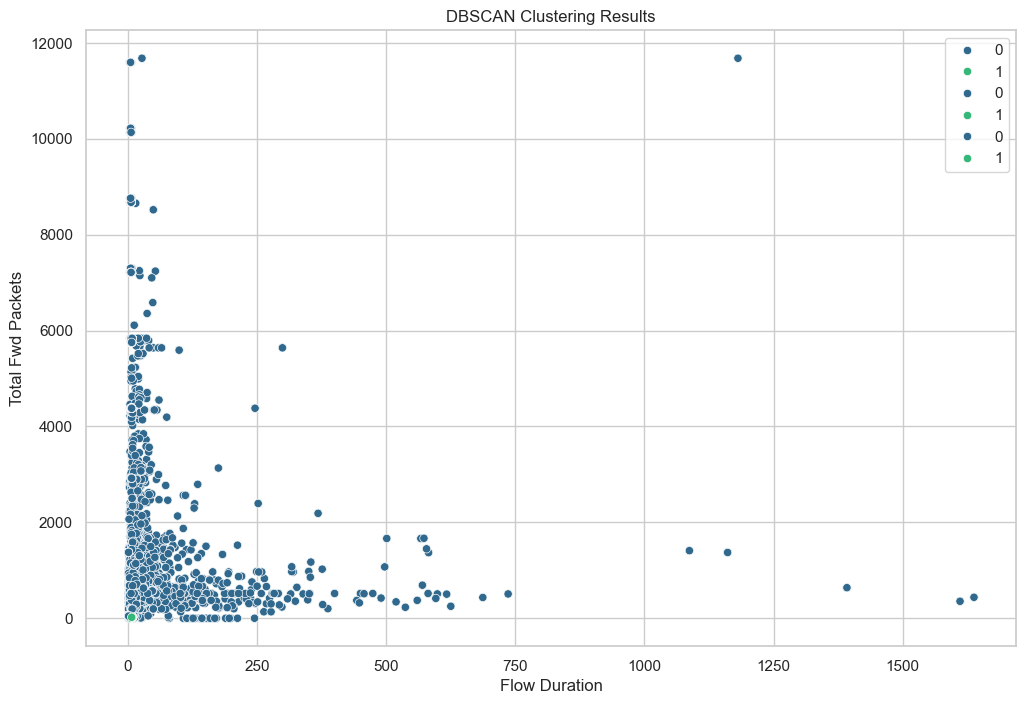

In [277]:

# Plot the clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train['Total Fwd Packets'], y=X_train['Fwd Packet Length Max'], hue=X_train['New_Cluster'], palette='viridis')

plt.title('DBSCAN Clustering Results')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()

<Axes: xlabel='Total Fwd Packets', ylabel='Fwd Packet Length Max'>

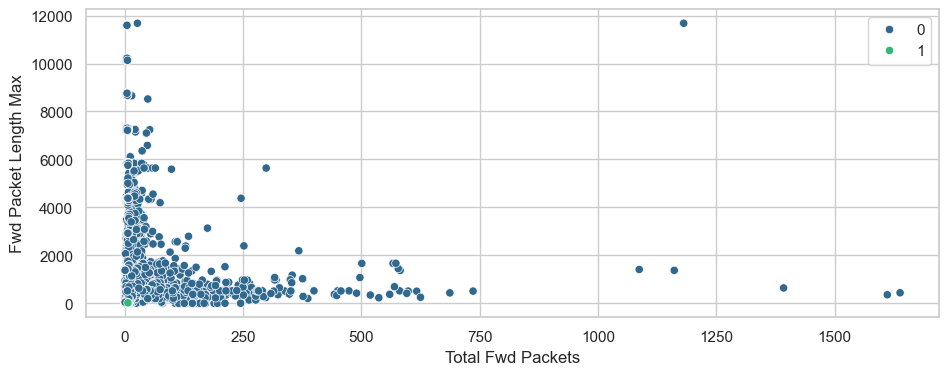

In [278]:
sns.scatterplot(x=X_train['Total Fwd Packets'], y=X_train['Fwd Packet Length Max'], hue=y_train, palette='viridis')


In [280]:
conf_matrix = confusion_matrix(y_train, X_train['New_Cluster'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True_0', 'True_1'], columns=['Cluster_0', 'Cluster_1'])


In [281]:
print("Confusion Matrix:")
print(conf_matrix_df)


Confusion Matrix:
        Cluster_0  Cluster_1
True_0      48386      20112
True_1      32562      56958


In [283]:

from sklearn.metrics import confusion_matrix, adjusted_rand_score
ari = adjusted_rand_score(y_train, X_train['New_Cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.1111


In [284]:
c_report = classification_report(y_train, X_train['New_Cluster'])

In [286]:
print(c_report)

              precision    recall  f1-score   support

           0       0.60      0.71      0.65     68498
           1       0.74      0.64      0.68     89520

    accuracy                           0.67    158018
   macro avg       0.67      0.67      0.67    158018
weighted avg       0.68      0.67      0.67    158018

